<a href="https://colab.research.google.com/github/RuslanFF1968/Pioneer/blob/main/Clustering_based_on_the_Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clustering using the genetic algorithm**

Implementation of clustering of data using genetic algorithms. Creation of three classes of two-dimensional points, selecting the class centers at a sufficient distance, and generating the points with a spread so that the classes do not intersect. It is necessary to arrange the indexes of the points, determine which class which point belongs to using a genetic algorithm. As a result, each class must consist of points of the same index. Visualizing the learning process and the final result.


In [ ]:
import random as random # Импортируем для генерации случайных значений
import numpy as np      # Импортируем библиотеку Numpy
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

(300, 2)


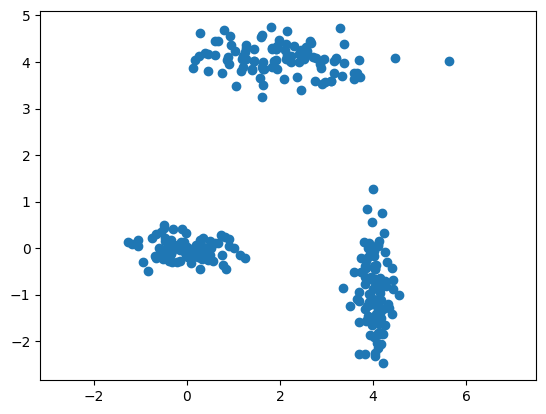

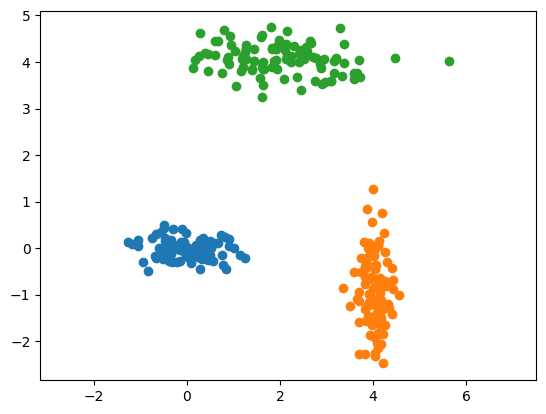

In [ ]:
center = [[0,0], [4,-1], [2,4]] # Указываем координаты центров

n = 100              # Число точек в каждом классе
k1 = [0.5, 0.2, 1]   # Указываем разброс случайных значений для x
k2 = [0.2, 0.8, 0.3] # Указываем разброс случайных значений для y

data = []            # Создаем массив из точек
for j in range(3):   # Проходим по 3 центрам
  for i in range(n): # Проходим по всем 100 точкам

    # Вычисляем x координату новой точки при помощи суммы координаты центра класса с случайным разбросом значения
    x = center[j][0] + k1[j]*random.normalvariate(0,1)

    # Вычисляем y координату новой точки при помощи суммы координаты центра класса с случайным разбросом значения
    y = center[j][1] + k2[j]*random.normalvariate(0,1)
    data.append([x,y]) # Добавляем новую координату

data = np.array(data) # Преобразуем переменную data в Numpy array
print(data.shape)     # Смотрим размер массива

plt.scatter(data[:,0], data[:,1]) # Рисуем точки
plt.axis('equal')                 # Делаем оси графика эквивалентными
plt.show()                        # Показываем график

# Рисуем точки по цветам
plt.scatter(data[:n,0], data[:n,1])       # Рисуем точки одного класса одним цветом
plt.scatter(data[n:2*n,0], data[n:2*n,1]) # Рисуем точки второго класса другим цветом
plt.scatter(data[2*n:,0], data[2*n:,1])   # Рисуем точки третьего класса третьим цветом
plt.axis('equal')                         # Делаем оси графика эквивалентными
plt.show()                                # Показываем график

15.760422709294366


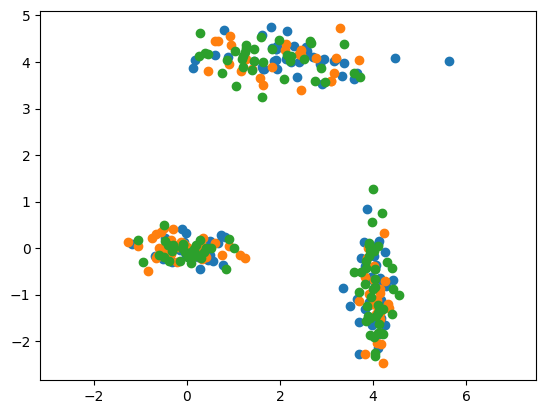

In [ ]:
# Функция для создания бота
def createBot():
  bot = np.array([random.randint(0,2) for i in range(3*n)]) # Создаем случайного бота
  return bot # Возвращаем бота

# Функция для отрисовки нового бота
def plotBot(bot):
  for i in range(3):          # Проходим по трем классам
    plotData = data[bot==i,:] # Берем точки, соответсвующие классу
    plt.scatter(plotData[:,0], plotData[:,1]) # Отображаем их на графике. С каждым новым классом цвет будет меняться

  plt.axis('equal') # Делаем оси графика эквивалентными
  plt.show()        # Показываем график

def getPointError(x, c):
   return np.sum((x-c)**2) # Евклидово расстояние

def getPointErrorFriends(x, cl, data, bot):
  data_friends = data[cl, :] # Получаем все дружеские точки
  dist = [getPointError(x, d) for d in data_friends] # Получаем расстояния до всех точек
  min_dist = min(dist)       # Берем точку, которая находится ближе всего к x
  return min_dist            # Возвращаем эту точку

def getPointErrorEnemies(x, cl, data, bot):
  data_enemies = []    # Список для всеч вражеских точек
  for cls in range(3): # Проходим по всем классам
    if (cls != cl):    # Если точка является вражеской
      data_enemies.extend(list(data[cls,:])) # Добавляем в список вражеских точек

  dist = [getPointError(x, d) for d in data_enemies] # Находим расстояния до вражеских точек
  min_dist = min(dist)       # Берем минимальное расстояние до вражеской точки
  return 1/(min_dist + 1e-3) # Чем больше будет расстояние до точки, тем меньше ошибка

# Функция для расчета ошибки бота
def getBotError(bot):
  call = []          # Создаем список центров классов
  for i in range(3): # Проходим по всем классам
    classData = data[bot==i,:] # Получаем точки, принадлежащие конкретному классу
    call.append(np.mean(classData,axis=0)) # Добавляем центр этих точек

  error = 0 # Создаем переменную для ошибки и приравниваем ее к 0
  for i in range(data.shape[0]): # Проходим по всем точкам
    c = call[bot[i]]             # Определяем центр
    add_error = getPointError(data[i], c) # Считаем ошибку по Евклидову расстоянию
    add_error *= getPointErrorFriends(data[i], bot[i], data, bot) # Умножаем значение ошибки на ошибку для дружеских точек
    add_error *= getPointErrorEnemies(data[i], bot[i], data, bot) # Умножаем значение ошибки на ошибку для вражеских точек
    error += add_error   # Прибавляем к значению ошибки

  error /= data.shape[0] # Делим на число точек
  return error           # Возвращаем ошибку

bot = createBot()       # Создаем бота
print(getBotError(bot)) # Считаем для него ошибку
plotBot(bot)            # Рисуем то, что говорит бот

0.6904055473870558


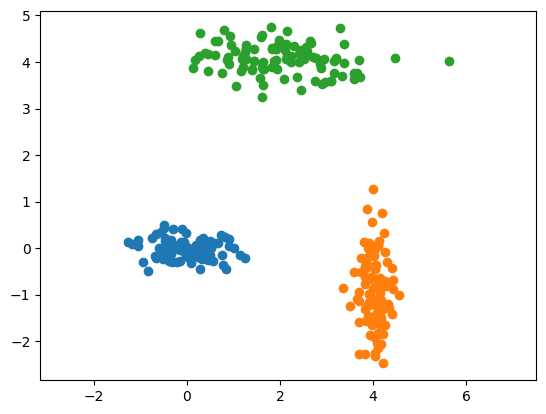

In [ ]:
# Отображаем идеального бота
idealBot = []
for i in range(3):     # Проходим по всем классам
  for j in range(n):   # Проходим по всем точкам
    idealBot.append(i) # Добавляем в бота класс

idealBot = np.array(idealBot) # Переводим в Numpy
print(getBotError(idealBot))  # Считаем ошибку для идеального бота
plotBot(idealBot)             # Отображаем бота

In [ ]:
# Получаем выжившую популяцию
def getSurvPopul(popul, val, nsurv, reverse):
  newpopul = []                       # Создаем список для новой популяции
  sval = sorted(val, reverse=reverse) # Сортируем ботов
  for i in range(nsurv):              # Для первых всех выживших
    index = val.index(sval[i])        # Берем индекс выжившего бота
    newpopul.append(popul[index])     # Добавляем в список новой популяции
  return newpopul, sval               # Возвращаем новую популяцию и сортированный список

# Функция для выбора родителей
def getParents(popul, nsurv):
  indexp1 = random.randint(0,nsurv-1) # Генерируем случайным образом индекс первого родителя
  indexp2 = random.randint(0,nsurv-1) # Генерируем случайным образом индекс второго родителя
  botp1 = newpopul[indexp1]           # Берем из выживших ботов первого родителя
  botp2 = newpopul[indexp2]           # Берем из выживших ботов второго родителя

  return botp1, botp2                 # Возвращаем обоих родителей

# Функция для выбора гена нового бота от какого-то родителя
def crossPointFrom2Parents(botp1, botp2, j):
  pindex = random.random() # Генерируем случайное значение для перенятия гена у конкретного родителя
  if pindex < 0:           # Если случайное значение меньше нуля
    x = botp1[j]           # Берем ген первого родителя
  else:
    x = botp2[j]           # Берем ген второго родителя
  return x                 # Возвращаем ген

0   [np.float64(11.92), np.float64(13.1), np.float64(13.48), np.float64(13.49), np.float64(13.57)]


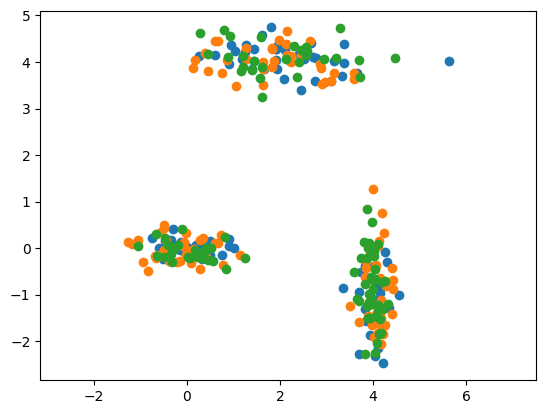

1   [np.float64(11.9), np.float64(11.91), np.float64(11.92), np.float64(11.92), np.float64(11.93)]
2   [np.float64(11.88), np.float64(11.9), np.float64(11.9), np.float64(11.9), np.float64(11.9)]
3   [np.float64(11.75), np.float64(11.85), np.float64(11.86), np.float64(11.87), np.float64(11.87)]
4   [np.float64(11.52), np.float64(11.59), np.float64(11.68), np.float64(11.72), np.float64(11.73)]
5   [np.float64(11.52), np.float64(11.54), np.float64(11.55), np.float64(11.56), np.float64(11.56)]
6   [np.float64(11.36), np.float64(11.42), np.float64(11.46), np.float64(11.5), np.float64(11.51)]
7   [np.float64(11.33), np.float64(11.34), np.float64(11.36), np.float64(11.37), np.float64(11.39)]
8   [np.float64(11.23), np.float64(11.24), np.float64(11.29), np.float64(11.31), np.float64(11.32)]
9   [np.float64(11.14), np.float64(11.2), np.float64(11.2), np.float64(11.21), np.float64(11.21)]
10   [np.float64(11.13), np.float64(11.14), np.float64(11.14), np.float64(11.14), np.float64(11.14)]


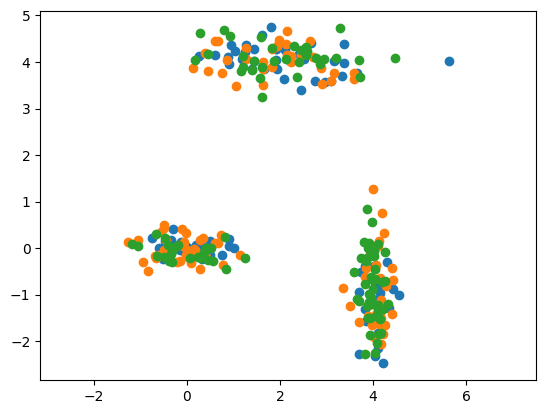

11   [np.float64(10.96), np.float64(11.05), np.float64(11.06), np.float64(11.07), np.float64(11.11)]
12   [np.float64(10.96), np.float64(10.96), np.float64(10.96), np.float64(10.96), np.float64(10.98)]
13   [np.float64(10.87), np.float64(10.88), np.float64(10.89), np.float64(10.92), np.float64(10.92)]
14   [np.float64(10.84), np.float64(10.84), np.float64(10.86), np.float64(10.87), np.float64(10.87)]
15   [np.float64(10.72), np.float64(10.79), np.float64(10.81), np.float64(10.81), np.float64(10.83)]
16   [np.float64(10.71), np.float64(10.71), np.float64(10.72), np.float64(10.74), np.float64(10.75)]
17   [np.float64(10.69), np.float64(10.71), np.float64(10.71), np.float64(10.71), np.float64(10.71)]
18   [np.float64(10.66), np.float64(10.66), np.float64(10.67), np.float64(10.68), np.float64(10.68)]
19   [np.float64(10.59), np.float64(10.59), np.float64(10.62), np.float64(10.63), np.float64(10.63)]
20   [np.float64(10.59), np.float64(10.59), np.float64(10.59), np.float64(10.59), np.float6

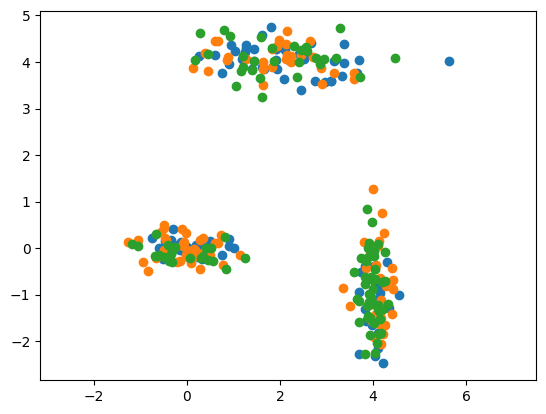

21   [np.float64(10.45), np.float64(10.51), np.float64(10.54), np.float64(10.55), np.float64(10.56)]
22   [np.float64(10.39), np.float64(10.42), np.float64(10.44), np.float64(10.45), np.float64(10.45)]
23   [np.float64(10.33), np.float64(10.35), np.float64(10.35), np.float64(10.37), np.float64(10.38)]
24   [np.float64(10.29), np.float64(10.3), np.float64(10.3), np.float64(10.33), np.float64(10.33)]
25   [np.float64(10.19), np.float64(10.23), np.float64(10.26), np.float64(10.26), np.float64(10.29)]
26   [np.float64(10.14), np.float64(10.16), np.float64(10.19), np.float64(10.2), np.float64(10.2)]
27   [np.float64(9.99), np.float64(10.07), np.float64(10.1), np.float64(10.14), np.float64(10.14)]
28   [np.float64(9.95), np.float64(9.98), np.float64(9.99), np.float64(9.99), np.float64(9.99)]
29   [np.float64(9.9), np.float64(9.92), np.float64(9.94), np.float64(9.94), np.float64(9.94)]
30   [np.float64(9.82), np.float64(9.86), np.float64(9.88), np.float64(9.89), np.float64(9.9)]


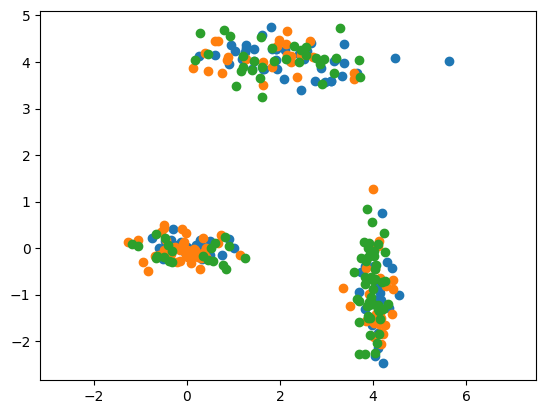

31   [np.float64(9.82), np.float64(9.82), np.float64(9.84), np.float64(9.85), np.float64(9.86)]
32   [np.float64(9.63), np.float64(9.75), np.float64(9.76), np.float64(9.8), np.float64(9.81)]
33   [np.float64(9.58), np.float64(9.59), np.float64(9.59), np.float64(9.63), np.float64(9.63)]
34   [np.float64(9.51), np.float64(9.54), np.float64(9.54), np.float64(9.55), np.float64(9.56)]
35   [np.float64(9.5), np.float64(9.51), np.float64(9.51), np.float64(9.51), np.float64(9.51)]
36   [np.float64(9.45), np.float64(9.45), np.float64(9.46), np.float64(9.46), np.float64(9.47)]
37   [np.float64(9.39), np.float64(9.39), np.float64(9.42), np.float64(9.42), np.float64(9.43)]
38   [np.float64(9.34), np.float64(9.37), np.float64(9.39), np.float64(9.39), np.float64(9.39)]
39   [np.float64(9.34), np.float64(9.34), np.float64(9.34), np.float64(9.34), np.float64(9.36)]
40   [np.float64(9.26), np.float64(9.29), np.float64(9.3), np.float64(9.3), np.float64(9.32)]


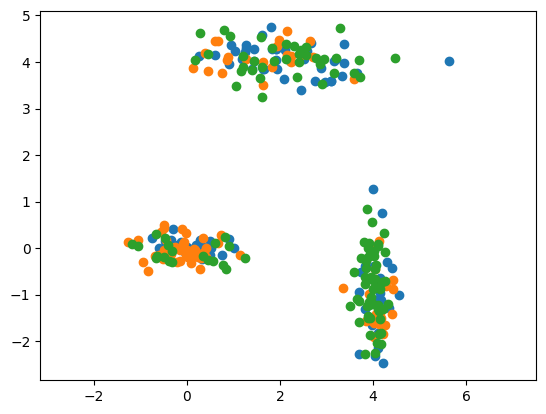

41   [np.float64(9.19), np.float64(9.2), np.float64(9.22), np.float64(9.22), np.float64(9.24)]
42   [np.float64(9.17), np.float64(9.18), np.float64(9.19), np.float64(9.19), np.float64(9.19)]
43   [np.float64(9.12), np.float64(9.14), np.float64(9.16), np.float64(9.17), np.float64(9.17)]
44   [np.float64(9.05), np.float64(9.06), np.float64(9.06), np.float64(9.07), np.float64(9.12)]
45   [np.float64(9.0), np.float64(9.0), np.float64(9.02), np.float64(9.04), np.float64(9.04)]
46   [np.float64(8.97), np.float64(8.98), np.float64(9.0), np.float64(9.0), np.float64(9.0)]
47   [np.float64(8.88), np.float64(8.9), np.float64(8.91), np.float64(8.92), np.float64(8.93)]
48   [np.float64(8.85), np.float64(8.88), np.float64(8.88), np.float64(8.88), np.float64(8.89)]
49   [np.float64(8.84), np.float64(8.84), np.float64(8.84), np.float64(8.84), np.float64(8.85)]
50   [np.float64(8.77), np.float64(8.78), np.float64(8.79), np.float64(8.79), np.float64(8.79)]


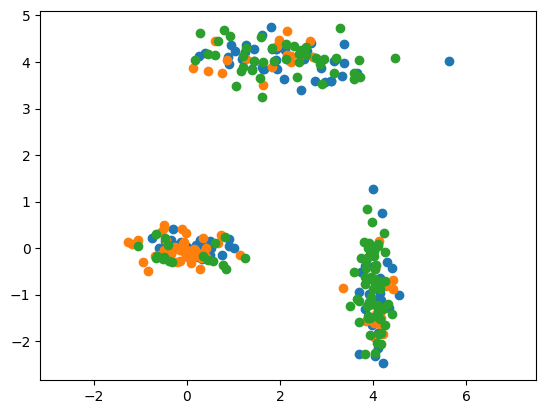

51   [np.float64(8.71), np.float64(8.77), np.float64(8.77), np.float64(8.77), np.float64(8.77)]
52   [np.float64(8.66), np.float64(8.71), np.float64(8.71), np.float64(8.71), np.float64(8.73)]
53   [np.float64(8.65), np.float64(8.66), np.float64(8.66), np.float64(8.67), np.float64(8.68)]
54   [np.float64(8.62), np.float64(8.62), np.float64(8.65), np.float64(8.65), np.float64(8.66)]
55   [np.float64(8.52), np.float64(8.61), np.float64(8.61), np.float64(8.61), np.float64(8.61)]
56   [np.float64(8.46), np.float64(8.5), np.float64(8.52), np.float64(8.54), np.float64(8.56)]
57   [np.float64(8.44), np.float64(8.44), np.float64(8.46), np.float64(8.47), np.float64(8.5)]
58   [np.float64(8.39), np.float64(8.42), np.float64(8.42), np.float64(8.42), np.float64(8.44)]
59   [np.float64(8.39), np.float64(8.39), np.float64(8.4), np.float64(8.4), np.float64(8.41)]
60   [np.float64(8.29), np.float64(8.34), np.float64(8.34), np.float64(8.37), np.float64(8.37)]


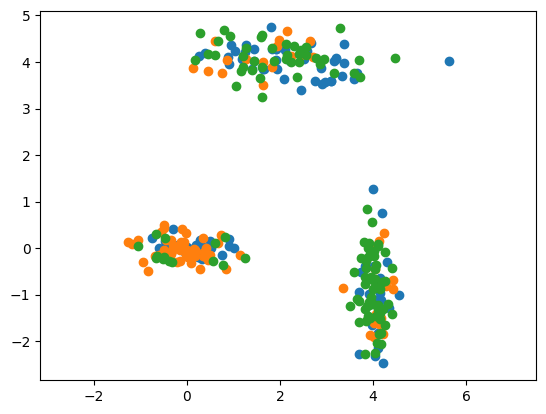

61   [np.float64(8.21), np.float64(8.26), np.float64(8.29), np.float64(8.29), np.float64(8.33)]
62   [np.float64(8.2), np.float64(8.2), np.float64(8.21), np.float64(8.21), np.float64(8.23)]
63   [np.float64(8.14), np.float64(8.15), np.float64(8.19), np.float64(8.2), np.float64(8.2)]
64   [np.float64(8.05), np.float64(8.06), np.float64(8.08), np.float64(8.11), np.float64(8.14)]
65   [np.float64(7.99), np.float64(8.05), np.float64(8.05), np.float64(8.05), np.float64(8.06)]
66   [np.float64(7.97), np.float64(7.97), np.float64(7.99), np.float64(7.99), np.float64(8.0)]
67   [np.float64(7.95), np.float64(7.95), np.float64(7.97), np.float64(7.97), np.float64(7.97)]
68   [np.float64(7.9), np.float64(7.9), np.float64(7.93), np.float64(7.95), np.float64(7.95)]
69   [np.float64(7.81), np.float64(7.84), np.float64(7.89), np.float64(7.89), np.float64(7.9)]
70   [np.float64(7.74), np.float64(7.81), np.float64(7.82), np.float64(7.84), np.float64(7.84)]


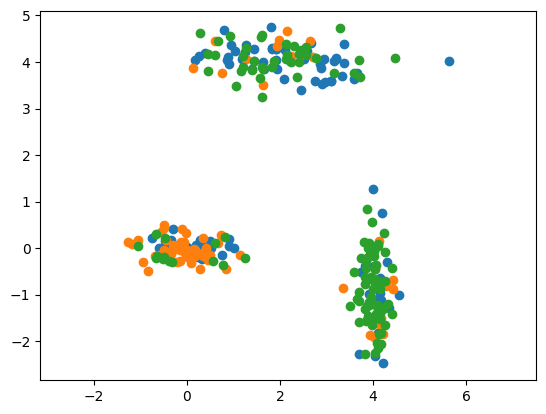

71   [np.float64(7.74), np.float64(7.74), np.float64(7.75), np.float64(7.79), np.float64(7.8)]
72   [np.float64(7.69), np.float64(7.74), np.float64(7.74), np.float64(7.74), np.float64(7.74)]
73   [np.float64(7.68), np.float64(7.69), np.float64(7.7), np.float64(7.73), np.float64(7.73)]
74   [np.float64(7.63), np.float64(7.64), np.float64(7.65), np.float64(7.67), np.float64(7.68)]
75   [np.float64(7.63), np.float64(7.63), np.float64(7.64), np.float64(7.64), np.float64(7.65)]
76   [np.float64(7.6), np.float64(7.62), np.float64(7.62), np.float64(7.63), np.float64(7.63)]
77   [np.float64(7.58), np.float64(7.58), np.float64(7.58), np.float64(7.58), np.float64(7.6)]
78   [np.float64(7.5), np.float64(7.51), np.float64(7.51), np.float64(7.55), np.float64(7.55)]
79   [np.float64(7.47), np.float64(7.5), np.float64(7.5), np.float64(7.5), np.float64(7.51)]
80   [np.float64(7.39), np.float64(7.39), np.float64(7.4), np.float64(7.44), np.float64(7.46)]


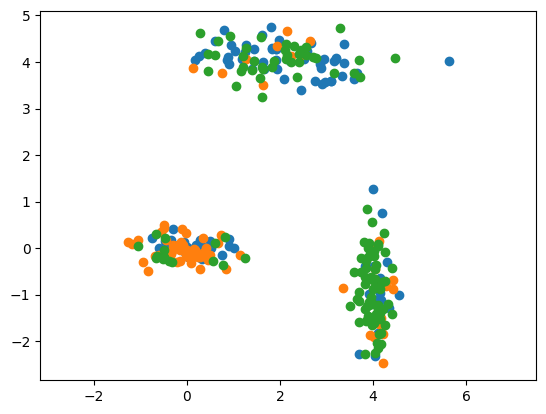

81   [np.float64(7.38), np.float64(7.39), np.float64(7.39), np.float64(7.39), np.float64(7.39)]
82   [np.float64(7.33), np.float64(7.36), np.float64(7.38), np.float64(7.39), np.float64(7.39)]
83   [np.float64(7.27), np.float64(7.3), np.float64(7.33), np.float64(7.33), np.float64(7.33)]
84   [np.float64(7.22), np.float64(7.23), np.float64(7.25), np.float64(7.27), np.float64(7.28)]
85   [np.float64(7.21), np.float64(7.21), np.float64(7.22), np.float64(7.23), np.float64(7.23)]
86   [np.float64(7.14), np.float64(7.16), np.float64(7.18), np.float64(7.18), np.float64(7.19)]
87   [np.float64(7.11), np.float64(7.14), np.float64(7.14), np.float64(7.16), np.float64(7.16)]
88   [np.float64(7.02), np.float64(7.11), np.float64(7.11), np.float64(7.12), np.float64(7.12)]
89   [np.float64(7.02), np.float64(7.07), np.float64(7.08), np.float64(7.08), np.float64(7.09)]
90   [np.float64(7.02), np.float64(7.02), np.float64(7.02), np.float64(7.02), np.float64(7.03)]


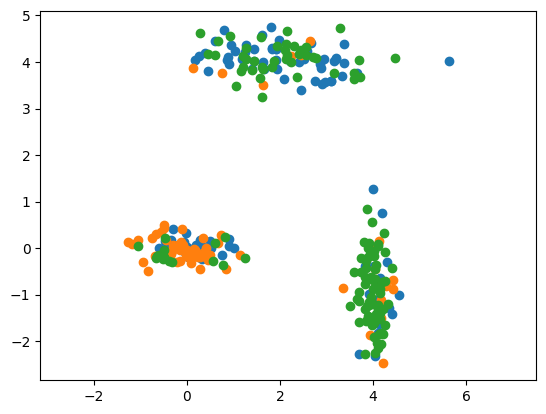

91   [np.float64(6.95), np.float64(6.96), np.float64(7.0), np.float64(7.01), np.float64(7.02)]
92   [np.float64(6.95), np.float64(6.95), np.float64(6.96), np.float64(6.96), np.float64(6.96)]
93   [np.float64(6.87), np.float64(6.88), np.float64(6.91), np.float64(6.95), np.float64(6.95)]
94   [np.float64(6.86), np.float64(6.87), np.float64(6.87), np.float64(6.87), np.float64(6.88)]
95   [np.float64(6.79), np.float64(6.82), np.float64(6.86), np.float64(6.86), np.float64(6.87)]
96   [np.float64(6.76), np.float64(6.79), np.float64(6.82), np.float64(6.82), np.float64(6.85)]
97   [np.float64(6.76), np.float64(6.77), np.float64(6.78), np.float64(6.79), np.float64(6.8)]
98   [np.float64(6.71), np.float64(6.72), np.float64(6.73), np.float64(6.76), np.float64(6.76)]
99   [np.float64(6.58), np.float64(6.71), np.float64(6.71), np.float64(6.71), np.float64(6.71)]
100   [np.float64(6.57), np.float64(6.58), np.float64(6.63), np.float64(6.64), np.float64(6.65)]


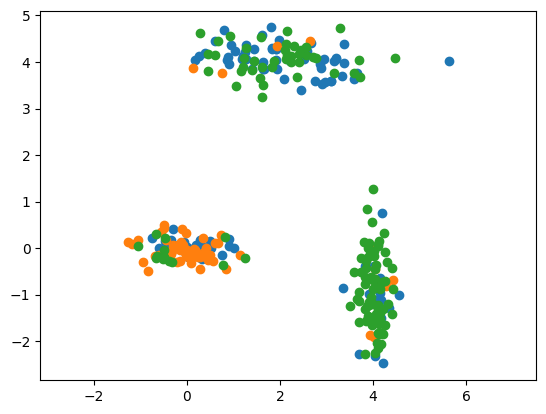

101   [np.float64(6.55), np.float64(6.57), np.float64(6.57), np.float64(6.57), np.float64(6.57)]
102   [np.float64(6.5), np.float64(6.54), np.float64(6.54), np.float64(6.55), np.float64(6.55)]
103   [np.float64(6.39), np.float64(6.48), np.float64(6.5), np.float64(6.52), np.float64(6.54)]
104   [np.float64(6.35), np.float64(6.39), np.float64(6.41), np.float64(6.48), np.float64(6.49)]
105   [np.float64(6.35), np.float64(6.35), np.float64(6.37), np.float64(6.37), np.float64(6.38)]
106   [np.float64(6.32), np.float64(6.35), np.float64(6.35), np.float64(6.35), np.float64(6.35)]
107   [np.float64(6.29), np.float64(6.31), np.float64(6.32), np.float64(6.33), np.float64(6.33)]
108   [np.float64(6.25), np.float64(6.26), np.float64(6.26), np.float64(6.29), np.float64(6.29)]
109   [np.float64(6.22), np.float64(6.25), np.float64(6.25), np.float64(6.25), np.float64(6.25)]
110   [np.float64(6.19), np.float64(6.22), np.float64(6.22), np.float64(6.23), np.float64(6.23)]


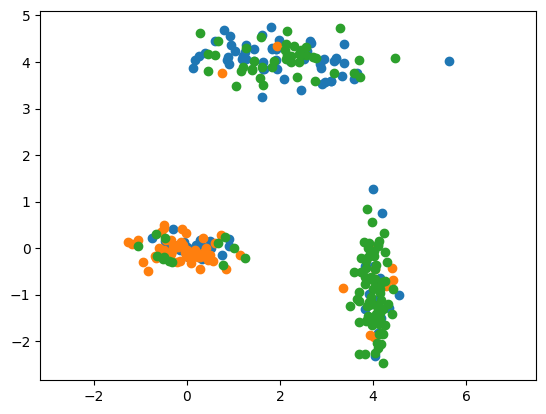

111   [np.float64(6.18), np.float64(6.19), np.float64(6.19), np.float64(6.2), np.float64(6.21)]
112   [np.float64(6.08), np.float64(6.13), np.float64(6.15), np.float64(6.18), np.float64(6.19)]
113   [np.float64(6.08), np.float64(6.1), np.float64(6.13), np.float64(6.13), np.float64(6.13)]
114   [np.float64(6.07), np.float64(6.08), np.float64(6.08), np.float64(6.1), np.float64(6.11)]
115   [np.float64(6.04), np.float64(6.06), np.float64(6.06), np.float64(6.06), np.float64(6.07)]
116   [np.float64(6.04), np.float64(6.04), np.float64(6.04), np.float64(6.04), np.float64(6.05)]
117   [np.float64(6.01), np.float64(6.02), np.float64(6.02), np.float64(6.03), np.float64(6.03)]
118   [np.float64(6.01), np.float64(6.01), np.float64(6.02), np.float64(6.02), np.float64(6.02)]
119   [np.float64(5.84), np.float64(5.95), np.float64(5.96), np.float64(5.97), np.float64(5.98)]
120   [np.float64(5.84), np.float64(5.88), np.float64(5.9), np.float64(5.92), np.float64(5.92)]


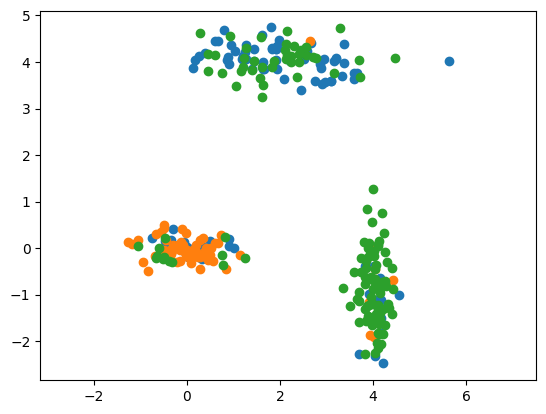

121   [np.float64(5.84), np.float64(5.86), np.float64(5.86), np.float64(5.88), np.float64(5.89)]
122   [np.float64(5.84), np.float64(5.86), np.float64(5.86), np.float64(5.86), np.float64(5.88)]
123   [np.float64(5.77), np.float64(5.79), np.float64(5.84), np.float64(5.84), np.float64(5.84)]
124   [np.float64(5.76), np.float64(5.76), np.float64(5.77), np.float64(5.79), np.float64(5.81)]
125   [np.float64(5.74), np.float64(5.76), np.float64(5.76), np.float64(5.76), np.float64(5.76)]
126   [np.float64(5.7), np.float64(5.71), np.float64(5.71), np.float64(5.73), np.float64(5.74)]
127   [np.float64(5.69), np.float64(5.7), np.float64(5.7), np.float64(5.71), np.float64(5.71)]
128   [np.float64(5.67), np.float64(5.68), np.float64(5.69), np.float64(5.69), np.float64(5.69)]
129   [np.float64(5.61), np.float64(5.64), np.float64(5.65), np.float64(5.67), np.float64(5.68)]
130   [np.float64(5.61), np.float64(5.61), np.float64(5.62), np.float64(5.63), np.float64(5.64)]


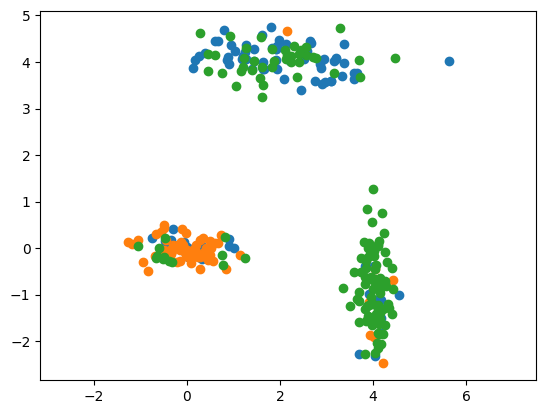

131   [np.float64(5.54), np.float64(5.56), np.float64(5.58), np.float64(5.6), np.float64(5.61)]
132   [np.float64(5.46), np.float64(5.54), np.float64(5.56), np.float64(5.56), np.float64(5.56)]
133   [np.float64(5.43), np.float64(5.46), np.float64(5.51), np.float64(5.51), np.float64(5.54)]
134   [np.float64(5.43), np.float64(5.43), np.float64(5.44), np.float64(5.46), np.float64(5.49)]
135   [np.float64(5.4), np.float64(5.4), np.float64(5.43), np.float64(5.43), np.float64(5.43)]
136   [np.float64(5.35), np.float64(5.39), np.float64(5.4), np.float64(5.4), np.float64(5.4)]
137   [np.float64(5.32), np.float64(5.33), np.float64(5.35), np.float64(5.39), np.float64(5.39)]
138   [np.float64(5.31), np.float64(5.32), np.float64(5.32), np.float64(5.32), np.float64(5.33)]
139   [np.float64(5.19), np.float64(5.29), np.float64(5.31), np.float64(5.31), np.float64(5.32)]
140   [np.float64(5.18), np.float64(5.19), np.float64(5.19), np.float64(5.2), np.float64(5.28)]


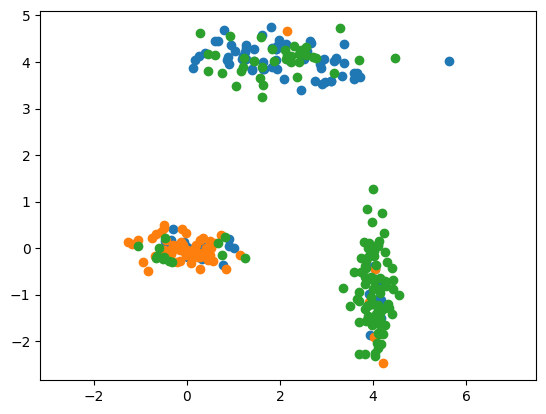

141   [np.float64(5.16), np.float64(5.18), np.float64(5.18), np.float64(5.19), np.float64(5.19)]
142   [np.float64(5.16), np.float64(5.17), np.float64(5.18), np.float64(5.18), np.float64(5.19)]
143   [np.float64(5.06), np.float64(5.16), np.float64(5.16), np.float64(5.16), np.float64(5.17)]
144   [np.float64(5.06), np.float64(5.06), np.float64(5.12), np.float64(5.13), np.float64(5.14)]
145   [np.float64(5.06), np.float64(5.06), np.float64(5.09), np.float64(5.09), np.float64(5.11)]
146   [np.float64(4.97), np.float64(5.06), np.float64(5.06), np.float64(5.06), np.float64(5.09)]
147   [np.float64(4.97), np.float64(4.98), np.float64(4.99), np.float64(5.03), np.float64(5.03)]
148   [np.float64(4.97), np.float64(4.97), np.float64(4.98), np.float64(4.98), np.float64(4.99)]
149   [np.float64(4.95), np.float64(4.96), np.float64(4.97), np.float64(4.97), np.float64(4.97)]
150   [np.float64(4.93), np.float64(4.95), np.float64(4.96), np.float64(4.96), np.float64(4.97)]


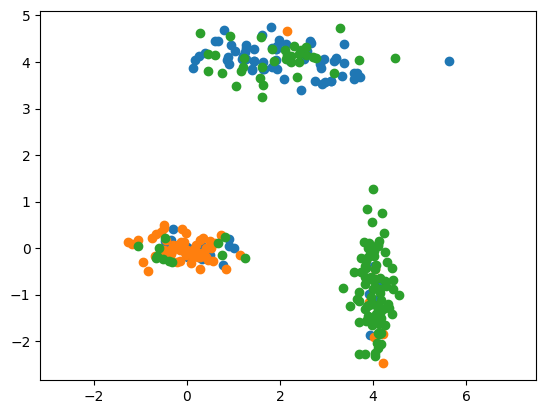

151   [np.float64(4.85), np.float64(4.87), np.float64(4.92), np.float64(4.93), np.float64(4.95)]
152   [np.float64(4.85), np.float64(4.85), np.float64(4.87), np.float64(4.9), np.float64(4.91)]
153   [np.float64(4.76), np.float64(4.78), np.float64(4.84), np.float64(4.85), np.float64(4.85)]
154   [np.float64(4.74), np.float64(4.76), np.float64(4.76), np.float64(4.77), np.float64(4.78)]
155   [np.float64(4.67), np.float64(4.71), np.float64(4.74), np.float64(4.76), np.float64(4.76)]
156   [np.float64(4.6), np.float64(4.67), np.float64(4.71), np.float64(4.71), np.float64(4.74)]
157   [np.float64(4.6), np.float64(4.67), np.float64(4.67), np.float64(4.7), np.float64(4.7)]
158   [np.float64(4.6), np.float64(4.6), np.float64(4.66), np.float64(4.67), np.float64(4.67)]
159   [np.float64(4.6), np.float64(4.6), np.float64(4.65), np.float64(4.65), np.float64(4.65)]
160   [np.float64(4.58), np.float64(4.6), np.float64(4.6), np.float64(4.6), np.float64(4.6)]


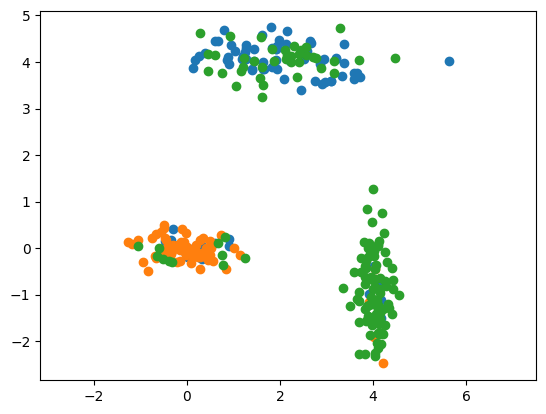

161   [np.float64(4.52), np.float64(4.55), np.float64(4.58), np.float64(4.58), np.float64(4.59)]
162   [np.float64(4.5), np.float64(4.52), np.float64(4.52), np.float64(4.52), np.float64(4.55)]
163   [np.float64(4.46), np.float64(4.48), np.float64(4.49), np.float64(4.5), np.float64(4.5)]
164   [np.float64(4.46), np.float64(4.46), np.float64(4.48), np.float64(4.49), np.float64(4.5)]
165   [np.float64(4.45), np.float64(4.46), np.float64(4.46), np.float64(4.47), np.float64(4.48)]
166   [np.float64(4.43), np.float64(4.45), np.float64(4.45), np.float64(4.45), np.float64(4.46)]
167   [np.float64(4.35), np.float64(4.43), np.float64(4.45), np.float64(4.45), np.float64(4.45)]
168   [np.float64(4.35), np.float64(4.35), np.float64(4.42), np.float64(4.43), np.float64(4.43)]
169   [np.float64(4.35), np.float64(4.35), np.float64(4.35), np.float64(4.35), np.float64(4.35)]
170   [np.float64(4.32), np.float64(4.34), np.float64(4.35), np.float64(4.35), np.float64(4.35)]


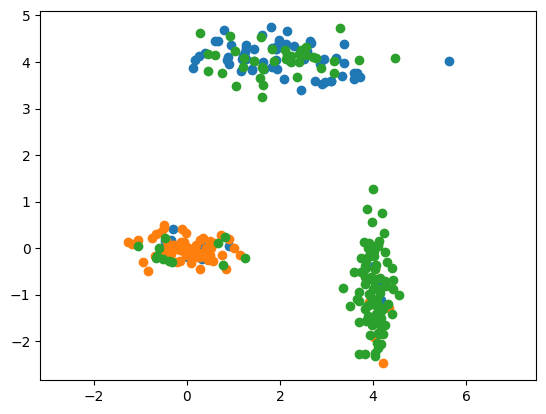

171   [np.float64(4.28), np.float64(4.32), np.float64(4.32), np.float64(4.32), np.float64(4.34)]
172   [np.float64(4.24), np.float64(4.28), np.float64(4.29), np.float64(4.31), np.float64(4.32)]
173   [np.float64(4.22), np.float64(4.24), np.float64(4.25), np.float64(4.28), np.float64(4.29)]
174   [np.float64(4.22), np.float64(4.24), np.float64(4.25), np.float64(4.25), np.float64(4.28)]
175   [np.float64(4.22), np.float64(4.22), np.float64(4.22), np.float64(4.24), np.float64(4.25)]
176   [np.float64(4.19), np.float64(4.22), np.float64(4.22), np.float64(4.22), np.float64(4.22)]
177   [np.float64(4.19), np.float64(4.19), np.float64(4.22), np.float64(4.22), np.float64(4.22)]
178   [np.float64(4.16), np.float64(4.16), np.float64(4.17), np.float64(4.18), np.float64(4.19)]
179   [np.float64(4.1), np.float64(4.11), np.float64(4.16), np.float64(4.16), np.float64(4.16)]
180   [np.float64(4.07), np.float64(4.1), np.float64(4.11), np.float64(4.11), np.float64(4.15)]


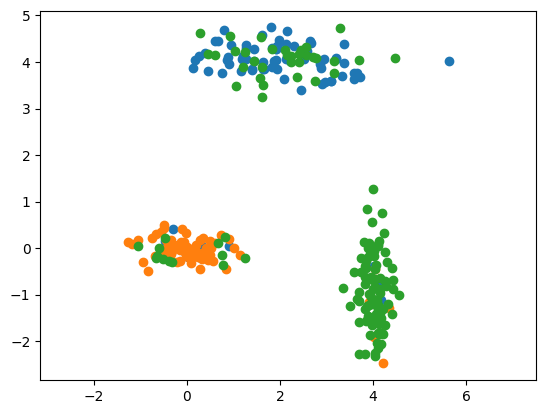

181   [np.float64(4.07), np.float64(4.07), np.float64(4.08), np.float64(4.09), np.float64(4.1)]
182   [np.float64(4.04), np.float64(4.07), np.float64(4.07), np.float64(4.07), np.float64(4.07)]
183   [np.float64(4.02), np.float64(4.03), np.float64(4.04), np.float64(4.04), np.float64(4.04)]
184   [np.float64(3.87), np.float64(4.02), np.float64(4.02), np.float64(4.02), np.float64(4.03)]
185   [np.float64(3.85), np.float64(3.87), np.float64(3.87), np.float64(3.97), np.float64(4.02)]
186   [np.float64(3.85), np.float64(3.87), np.float64(3.87), np.float64(3.87), np.float64(3.88)]
187   [np.float64(3.85), np.float64(3.87), np.float64(3.87), np.float64(3.87), np.float64(3.87)]
188   [np.float64(3.84), np.float64(3.85), np.float64(3.85), np.float64(3.85), np.float64(3.86)]
189   [np.float64(3.83), np.float64(3.84), np.float64(3.84), np.float64(3.85), np.float64(3.85)]
190   [np.float64(3.81), np.float64(3.81), np.float64(3.83), np.float64(3.84), np.float64(3.84)]


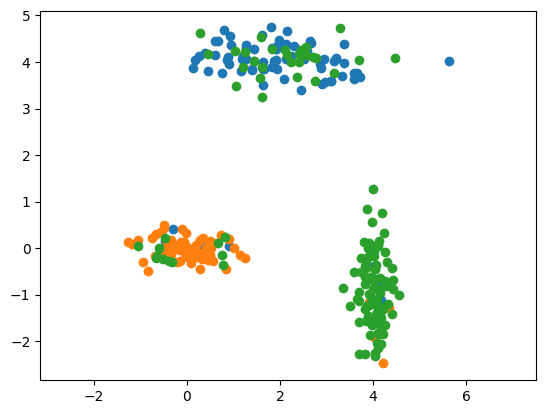

191   [np.float64(3.78), np.float64(3.81), np.float64(3.81), np.float64(3.82), np.float64(3.82)]
192   [np.float64(3.74), np.float64(3.78), np.float64(3.79), np.float64(3.8), np.float64(3.81)]
193   [np.float64(3.72), np.float64(3.74), np.float64(3.78), np.float64(3.79), np.float64(3.79)]
194   [np.float64(3.69), np.float64(3.72), np.float64(3.74), np.float64(3.74), np.float64(3.74)]
195   [np.float64(3.69), np.float64(3.69), np.float64(3.7), np.float64(3.71), np.float64(3.72)]
196   [np.float64(3.69), np.float64(3.69), np.float64(3.69), np.float64(3.7), np.float64(3.7)]
197   [np.float64(3.69), np.float64(3.69), np.float64(3.69), np.float64(3.69), np.float64(3.69)]
198   [np.float64(3.62), np.float64(3.65), np.float64(3.66), np.float64(3.69), np.float64(3.69)]
199   [np.float64(3.62), np.float64(3.63), np.float64(3.64), np.float64(3.65), np.float64(3.65)]
200   [np.float64(3.62), np.float64(3.63), np.float64(3.64), np.float64(3.64), np.float64(3.65)]


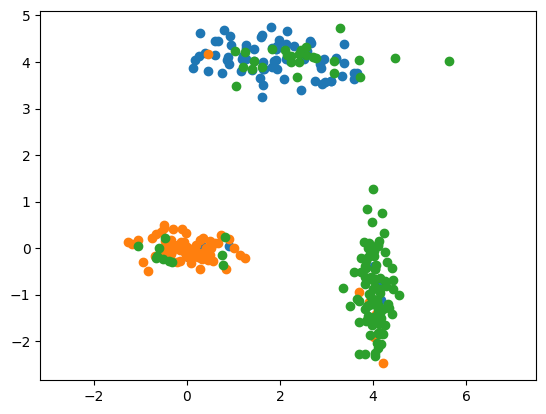

201   [np.float64(3.62), np.float64(3.63), np.float64(3.64), np.float64(3.64), np.float64(3.64)]
202   [np.float64(3.58), np.float64(3.62), np.float64(3.62), np.float64(3.63), np.float64(3.63)]
203   [np.float64(3.54), np.float64(3.58), np.float64(3.59), np.float64(3.61), np.float64(3.61)]
204   [np.float64(3.54), np.float64(3.54), np.float64(3.56), np.float64(3.58), np.float64(3.59)]
205   [np.float64(3.54), np.float64(3.54), np.float64(3.54), np.float64(3.54), np.float64(3.54)]
206   [np.float64(3.46), np.float64(3.49), np.float64(3.52), np.float64(3.52), np.float64(3.52)]
207   [np.float64(3.46), np.float64(3.46), np.float64(3.48), np.float64(3.49), np.float64(3.49)]
208   [np.float64(3.46), np.float64(3.46), np.float64(3.46), np.float64(3.46), np.float64(3.46)]
209   [np.float64(3.45), np.float64(3.46), np.float64(3.46), np.float64(3.46), np.float64(3.46)]
210   [np.float64(3.39), np.float64(3.43), np.float64(3.45), np.float64(3.46), np.float64(3.46)]


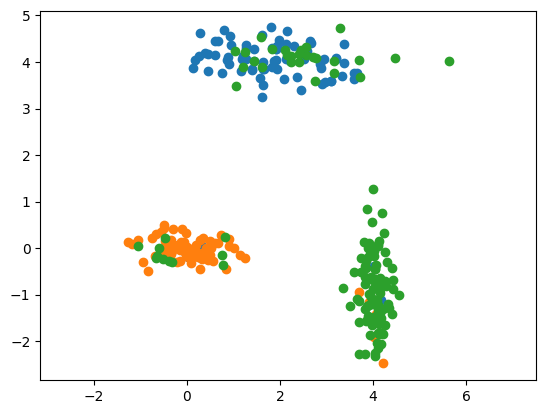

211   [np.float64(3.38), np.float64(3.39), np.float64(3.39), np.float64(3.41), np.float64(3.43)]
212   [np.float64(3.33), np.float64(3.38), np.float64(3.38), np.float64(3.39), np.float64(3.39)]
213   [np.float64(3.33), np.float64(3.37), np.float64(3.38), np.float64(3.38), np.float64(3.39)]
214   [np.float64(3.33), np.float64(3.33), np.float64(3.34), np.float64(3.35), np.float64(3.37)]
215   [np.float64(3.3), np.float64(3.32), np.float64(3.33), np.float64(3.33), np.float64(3.34)]
216   [np.float64(3.27), np.float64(3.3), np.float64(3.3), np.float64(3.31), np.float64(3.32)]
217   [np.float64(3.27), np.float64(3.27), np.float64(3.3), np.float64(3.3), np.float64(3.3)]
218   [np.float64(3.27), np.float64(3.27), np.float64(3.27), np.float64(3.27), np.float64(3.29)]
219   [np.float64(3.25), np.float64(3.27), np.float64(3.27), np.float64(3.27), np.float64(3.27)]
220   [np.float64(3.24), np.float64(3.25), np.float64(3.25), np.float64(3.26), np.float64(3.27)]


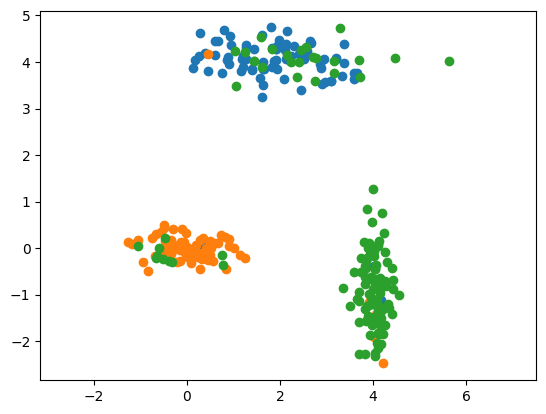

221   [np.float64(3.24), np.float64(3.25), np.float64(3.25), np.float64(3.25), np.float64(3.25)]
222   [np.float64(3.22), np.float64(3.24), np.float64(3.25), np.float64(3.25), np.float64(3.25)]
223   [np.float64(3.18), np.float64(3.21), np.float64(3.22), np.float64(3.22), np.float64(3.24)]
224   [np.float64(3.18), np.float64(3.18), np.float64(3.18), np.float64(3.21), np.float64(3.21)]
225   [np.float64(3.18), np.float64(3.18), np.float64(3.18), np.float64(3.18), np.float64(3.18)]
226   [np.float64(3.18), np.float64(3.18), np.float64(3.18), np.float64(3.18), np.float64(3.18)]
227   [np.float64(3.13), np.float64(3.16), np.float64(3.18), np.float64(3.18), np.float64(3.18)]
228   [np.float64(3.12), np.float64(3.13), np.float64(3.13), np.float64(3.13), np.float64(3.14)]
229   [np.float64(3.07), np.float64(3.12), np.float64(3.13), np.float64(3.13), np.float64(3.13)]
230   [np.float64(3.07), np.float64(3.07), np.float64(3.07), np.float64(3.12), np.float64(3.12)]


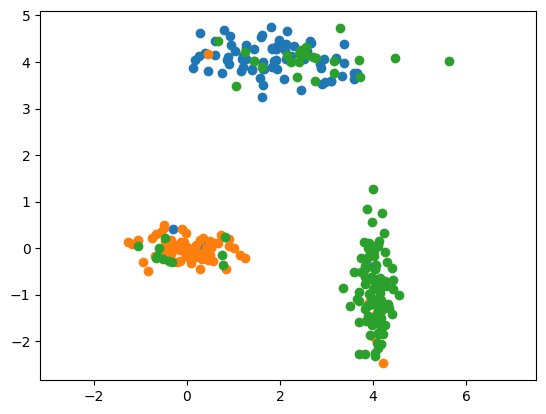

231   [np.float64(3.04), np.float64(3.04), np.float64(3.07), np.float64(3.07), np.float64(3.07)]
232   [np.float64(3.01), np.float64(3.03), np.float64(3.04), np.float64(3.04), np.float64(3.04)]
233   [np.float64(3.01), np.float64(3.01), np.float64(3.03), np.float64(3.04), np.float64(3.04)]
234   [np.float64(2.98), np.float64(3.0), np.float64(3.01), np.float64(3.01), np.float64(3.01)]
235   [np.float64(2.97), np.float64(2.98), np.float64(2.98), np.float64(3.0), np.float64(3.0)]
236   [np.float64(2.97), np.float64(2.98), np.float64(2.98), np.float64(2.98), np.float64(2.99)]
237   [np.float64(2.96), np.float64(2.97), np.float64(2.98), np.float64(2.98), np.float64(2.98)]
238   [np.float64(2.92), np.float64(2.94), np.float64(2.96), np.float64(2.96), np.float64(2.97)]
239   [np.float64(2.92), np.float64(2.92), np.float64(2.93), np.float64(2.94), np.float64(2.94)]
240   [np.float64(2.92), np.float64(2.92), np.float64(2.92), np.float64(2.93), np.float64(2.94)]


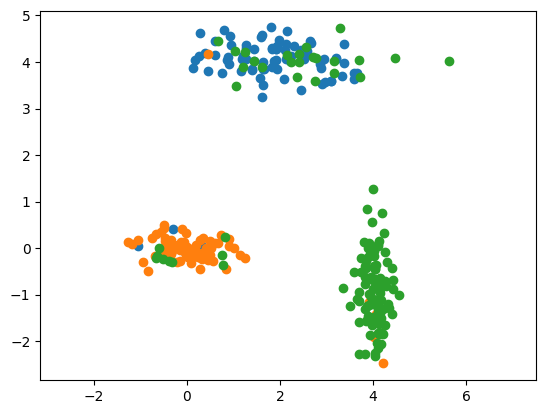

241   [np.float64(2.92), np.float64(2.92), np.float64(2.92), np.float64(2.93), np.float64(2.93)]
242   [np.float64(2.87), np.float64(2.92), np.float64(2.92), np.float64(2.92), np.float64(2.92)]
243   [np.float64(2.87), np.float64(2.87), np.float64(2.87), np.float64(2.88), np.float64(2.92)]
244   [np.float64(2.87), np.float64(2.87), np.float64(2.87), np.float64(2.87), np.float64(2.87)]
245   [np.float64(2.79), np.float64(2.81), np.float64(2.87), np.float64(2.87), np.float64(2.87)]
246   [np.float64(2.79), np.float64(2.79), np.float64(2.81), np.float64(2.81), np.float64(2.81)]
247   [np.float64(2.75), np.float64(2.79), np.float64(2.79), np.float64(2.79), np.float64(2.81)]
248   [np.float64(2.75), np.float64(2.75), np.float64(2.75), np.float64(2.79), np.float64(2.79)]
249   [np.float64(2.73), np.float64(2.75), np.float64(2.75), np.float64(2.75), np.float64(2.75)]
250   [np.float64(2.73), np.float64(2.73), np.float64(2.75), np.float64(2.75), np.float64(2.75)]


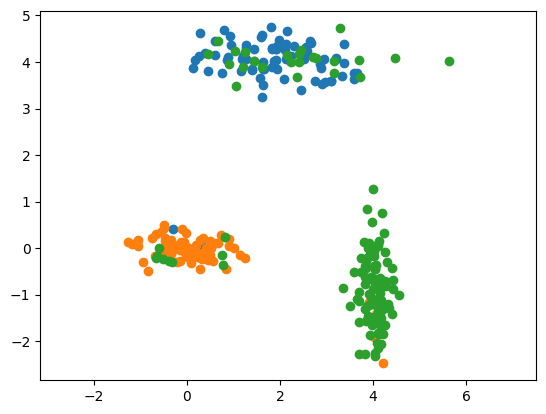

251   [np.float64(2.67), np.float64(2.71), np.float64(2.72), np.float64(2.72), np.float64(2.73)]
252   [np.float64(2.65), np.float64(2.67), np.float64(2.7), np.float64(2.7), np.float64(2.7)]
253   [np.float64(2.63), np.float64(2.65), np.float64(2.67), np.float64(2.67), np.float64(2.7)]
254   [np.float64(2.63), np.float64(2.63), np.float64(2.65), np.float64(2.65), np.float64(2.67)]
255   [np.float64(2.58), np.float64(2.63), np.float64(2.63), np.float64(2.63), np.float64(2.63)]
256   [np.float64(2.58), np.float64(2.58), np.float64(2.6), np.float64(2.63), np.float64(2.63)]
257   [np.float64(2.53), np.float64(2.58), np.float64(2.58), np.float64(2.6), np.float64(2.6)]
258   [np.float64(2.53), np.float64(2.58), np.float64(2.58), np.float64(2.58), np.float64(2.59)]
259   [np.float64(2.53), np.float64(2.58), np.float64(2.58), np.float64(2.58), np.float64(2.58)]
260   [np.float64(2.53), np.float64(2.53), np.float64(2.58), np.float64(2.58), np.float64(2.58)]


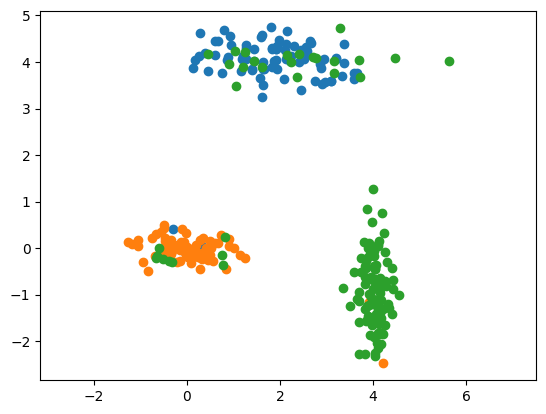

261   [np.float64(2.53), np.float64(2.53), np.float64(2.53), np.float64(2.53), np.float64(2.54)]
262   [np.float64(2.53), np.float64(2.53), np.float64(2.53), np.float64(2.53), np.float64(2.53)]
263   [np.float64(2.5), np.float64(2.53), np.float64(2.53), np.float64(2.53), np.float64(2.53)]
264   [np.float64(2.44), np.float64(2.5), np.float64(2.52), np.float64(2.53), np.float64(2.53)]
265   [np.float64(2.44), np.float64(2.48), np.float64(2.5), np.float64(2.5), np.float64(2.51)]
266   [np.float64(2.43), np.float64(2.44), np.float64(2.44), np.float64(2.47), np.float64(2.48)]
267   [np.float64(2.42), np.float64(2.43), np.float64(2.44), np.float64(2.44), np.float64(2.44)]
268   [np.float64(2.42), np.float64(2.42), np.float64(2.43), np.float64(2.44), np.float64(2.44)]
269   [np.float64(2.36), np.float64(2.4), np.float64(2.42), np.float64(2.42), np.float64(2.42)]
270   [np.float64(2.36), np.float64(2.36), np.float64(2.4), np.float64(2.41), np.float64(2.42)]


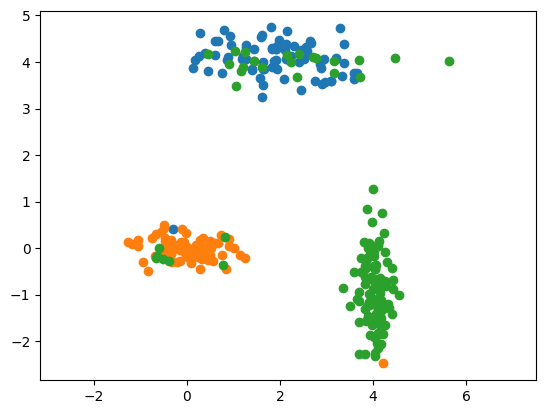

271   [np.float64(2.36), np.float64(2.36), np.float64(2.36), np.float64(2.38), np.float64(2.39)]
272   [np.float64(2.36), np.float64(2.36), np.float64(2.36), np.float64(2.36), np.float64(2.38)]
273   [np.float64(2.36), np.float64(2.36), np.float64(2.36), np.float64(2.36), np.float64(2.36)]
274   [np.float64(2.35), np.float64(2.36), np.float64(2.36), np.float64(2.36), np.float64(2.36)]
275   [np.float64(2.31), np.float64(2.31), np.float64(2.31), np.float64(2.32), np.float64(2.34)]
276   [np.float64(2.31), np.float64(2.31), np.float64(2.31), np.float64(2.31), np.float64(2.32)]
277   [np.float64(2.26), np.float64(2.31), np.float64(2.31), np.float64(2.31), np.float64(2.31)]
278   [np.float64(2.24), np.float64(2.26), np.float64(2.26), np.float64(2.28), np.float64(2.31)]
279   [np.float64(2.24), np.float64(2.24), np.float64(2.26), np.float64(2.26), np.float64(2.26)]
280   [np.float64(2.24), np.float64(2.24), np.float64(2.24), np.float64(2.26), np.float64(2.26)]


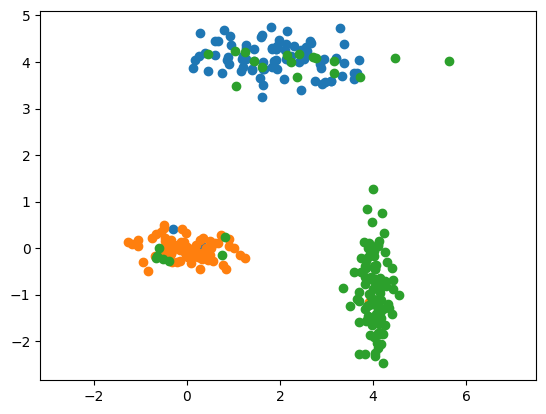

281   [np.float64(2.2), np.float64(2.22), np.float64(2.24), np.float64(2.24), np.float64(2.24)]
282   [np.float64(2.2), np.float64(2.2), np.float64(2.2), np.float64(2.22), np.float64(2.22)]
283   [np.float64(2.2), np.float64(2.2), np.float64(2.2), np.float64(2.2), np.float64(2.21)]
284   [np.float64(2.15), np.float64(2.16), np.float64(2.2), np.float64(2.2), np.float64(2.2)]
285   [np.float64(2.11), np.float64(2.15), np.float64(2.15), np.float64(2.15), np.float64(2.16)]
286   [np.float64(2.11), np.float64(2.11), np.float64(2.11), np.float64(2.15), np.float64(2.15)]
287   [np.float64(2.11), np.float64(2.11), np.float64(2.11), np.float64(2.11), np.float64(2.11)]
288   [np.float64(2.11), np.float64(2.11), np.float64(2.11), np.float64(2.11), np.float64(2.11)]
289   [np.float64(2.11), np.float64(2.11), np.float64(2.11), np.float64(2.11), np.float64(2.11)]
290   [np.float64(2.11), np.float64(2.11), np.float64(2.11), np.float64(2.11), np.float64(2.11)]


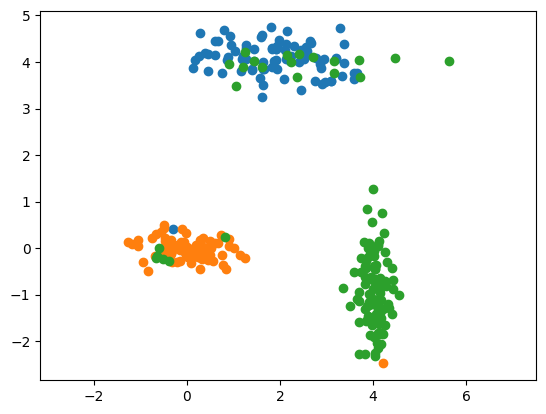

291   [np.float64(2.08), np.float64(2.11), np.float64(2.11), np.float64(2.11), np.float64(2.11)]
292   [np.float64(2.08), np.float64(2.08), np.float64(2.08), np.float64(2.1), np.float64(2.11)]
293   [np.float64(2.08), np.float64(2.08), np.float64(2.08), np.float64(2.08), np.float64(2.08)]
294   [np.float64(2.08), np.float64(2.08), np.float64(2.08), np.float64(2.08), np.float64(2.08)]
295   [np.float64(2.05), np.float64(2.08), np.float64(2.08), np.float64(2.08), np.float64(2.08)]
296   [np.float64(2.05), np.float64(2.05), np.float64(2.07), np.float64(2.08), np.float64(2.08)]
297   [np.float64(2.05), np.float64(2.05), np.float64(2.05), np.float64(2.05), np.float64(2.05)]
298   [np.float64(1.99), np.float64(2.05), np.float64(2.05), np.float64(2.05), np.float64(2.05)]
299   [np.float64(1.99), np.float64(1.99), np.float64(2.03), np.float64(2.05), np.float64(2.05)]
300   [np.float64(1.99), np.float64(1.99), np.float64(1.99), np.float64(2.02), np.float64(2.02)]


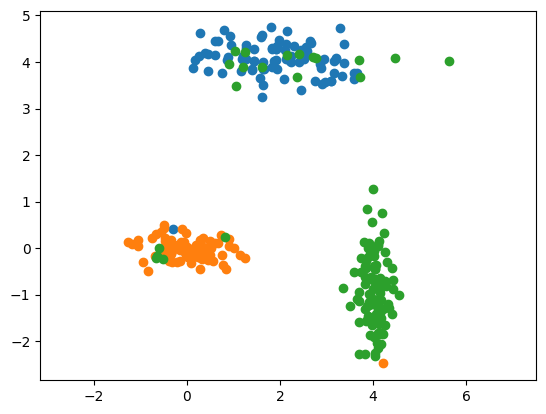

301   [np.float64(1.99), np.float64(1.99), np.float64(1.99), np.float64(2.02), np.float64(2.02)]
302   [np.float64(1.99), np.float64(1.99), np.float64(1.99), np.float64(1.99), np.float64(1.99)]
303   [np.float64(1.98), np.float64(1.99), np.float64(1.99), np.float64(1.99), np.float64(1.99)]
304   [np.float64(1.96), np.float64(1.96), np.float64(1.96), np.float64(1.98), np.float64(1.98)]
305   [np.float64(1.93), np.float64(1.96), np.float64(1.96), np.float64(1.96), np.float64(1.96)]
306   [np.float64(1.93), np.float64(1.95), np.float64(1.96), np.float64(1.96), np.float64(1.96)]
307   [np.float64(1.93), np.float64(1.93), np.float64(1.95), np.float64(1.95), np.float64(1.95)]
308   [np.float64(1.93), np.float64(1.93), np.float64(1.93), np.float64(1.95), np.float64(1.95)]
309   [np.float64(1.93), np.float64(1.93), np.float64(1.93), np.float64(1.93), np.float64(1.93)]
310   [np.float64(1.9), np.float64(1.93), np.float64(1.93), np.float64(1.93), np.float64(1.93)]


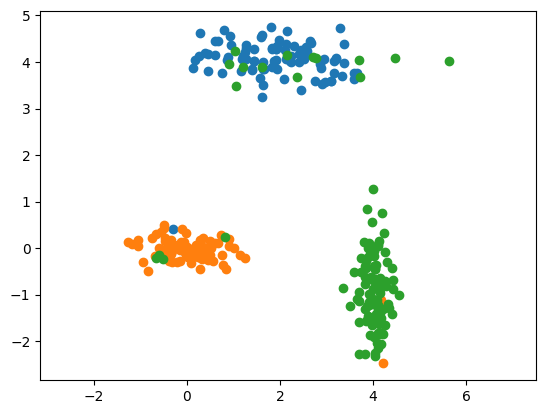

311   [np.float64(1.9), np.float64(1.93), np.float64(1.93), np.float64(1.93), np.float64(1.93)]
312   [np.float64(1.9), np.float64(1.9), np.float64(1.93), np.float64(1.93), np.float64(1.93)]
313   [np.float64(1.9), np.float64(1.9), np.float64(1.9), np.float64(1.9), np.float64(1.92)]
314   [np.float64(1.9), np.float64(1.9), np.float64(1.9), np.float64(1.9), np.float64(1.9)]
315   [np.float64(1.9), np.float64(1.9), np.float64(1.9), np.float64(1.9), np.float64(1.9)]
316   [np.float64(1.9), np.float64(1.9), np.float64(1.9), np.float64(1.9), np.float64(1.9)]
317   [np.float64(1.9), np.float64(1.9), np.float64(1.9), np.float64(1.9), np.float64(1.9)]
318   [np.float64(1.85), np.float64(1.9), np.float64(1.9), np.float64(1.9), np.float64(1.9)]
319   [np.float64(1.85), np.float64(1.87), np.float64(1.88), np.float64(1.9), np.float64(1.9)]
320   [np.float64(1.85), np.float64(1.86), np.float64(1.87), np.float64(1.88), np.float64(1.9)]


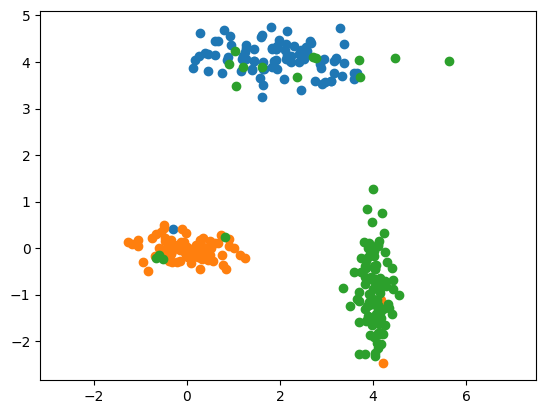

321   [np.float64(1.85), np.float64(1.85), np.float64(1.86), np.float64(1.86), np.float64(1.87)]
322   [np.float64(1.84), np.float64(1.85), np.float64(1.85), np.float64(1.86), np.float64(1.86)]
323   [np.float64(1.84), np.float64(1.85), np.float64(1.85), np.float64(1.85), np.float64(1.86)]
324   [np.float64(1.82), np.float64(1.84), np.float64(1.84), np.float64(1.84), np.float64(1.85)]
325   [np.float64(1.81), np.float64(1.82), np.float64(1.84), np.float64(1.84), np.float64(1.84)]
326   [np.float64(1.81), np.float64(1.81), np.float64(1.82), np.float64(1.84), np.float64(1.84)]
327   [np.float64(1.81), np.float64(1.81), np.float64(1.81), np.float64(1.82), np.float64(1.82)]
328   [np.float64(1.81), np.float64(1.81), np.float64(1.81), np.float64(1.81), np.float64(1.82)]
329   [np.float64(1.81), np.float64(1.81), np.float64(1.81), np.float64(1.81), np.float64(1.82)]
330   [np.float64(1.8), np.float64(1.8), np.float64(1.8), np.float64(1.81), np.float64(1.81)]


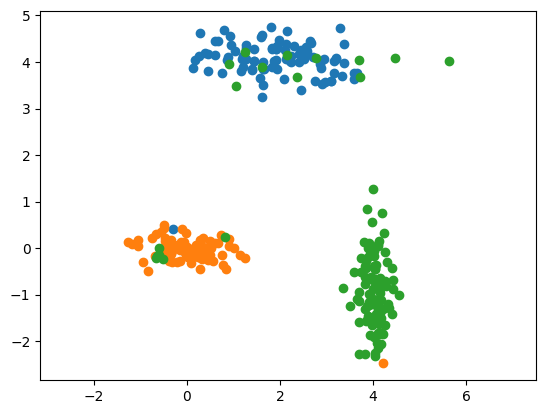

331   [np.float64(1.8), np.float64(1.8), np.float64(1.8), np.float64(1.8), np.float64(1.8)]
332   [np.float64(1.78), np.float64(1.8), np.float64(1.8), np.float64(1.8), np.float64(1.8)]
333   [np.float64(1.77), np.float64(1.78), np.float64(1.78), np.float64(1.8), np.float64(1.8)]
334   [np.float64(1.76), np.float64(1.77), np.float64(1.78), np.float64(1.78), np.float64(1.78)]
335   [np.float64(1.76), np.float64(1.76), np.float64(1.76), np.float64(1.77), np.float64(1.77)]
336   [np.float64(1.76), np.float64(1.76), np.float64(1.76), np.float64(1.77), np.float64(1.77)]
337   [np.float64(1.71), np.float64(1.76), np.float64(1.76), np.float64(1.76), np.float64(1.76)]
338   [np.float64(1.71), np.float64(1.76), np.float64(1.76), np.float64(1.76), np.float64(1.76)]
339   [np.float64(1.69), np.float64(1.71), np.float64(1.71), np.float64(1.74), np.float64(1.76)]
340   [np.float64(1.69), np.float64(1.69), np.float64(1.71), np.float64(1.71), np.float64(1.71)]


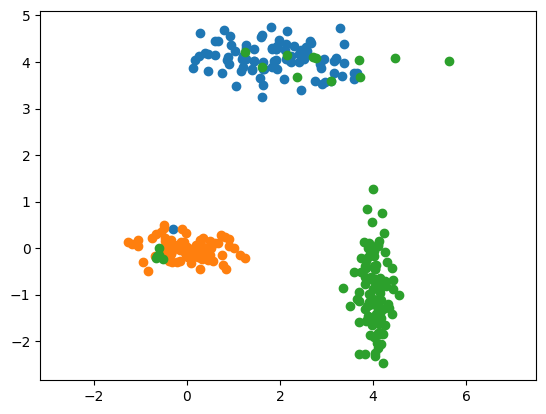

341   [np.float64(1.67), np.float64(1.69), np.float64(1.69), np.float64(1.69), np.float64(1.69)]
342   [np.float64(1.67), np.float64(1.69), np.float64(1.69), np.float64(1.69), np.float64(1.69)]
343   [np.float64(1.67), np.float64(1.69), np.float64(1.69), np.float64(1.69), np.float64(1.69)]
344   [np.float64(1.67), np.float64(1.69), np.float64(1.69), np.float64(1.69), np.float64(1.69)]
345   [np.float64(1.67), np.float64(1.69), np.float64(1.69), np.float64(1.69), np.float64(1.69)]
346   [np.float64(1.66), np.float64(1.67), np.float64(1.67), np.float64(1.69), np.float64(1.69)]
347   [np.float64(1.66), np.float64(1.66), np.float64(1.67), np.float64(1.67), np.float64(1.67)]
348   [np.float64(1.66), np.float64(1.66), np.float64(1.66), np.float64(1.66), np.float64(1.66)]
349   [np.float64(1.6), np.float64(1.66), np.float64(1.66), np.float64(1.66), np.float64(1.66)]
350   [np.float64(1.6), np.float64(1.6), np.float64(1.6), np.float64(1.6), np.float64(1.6)]


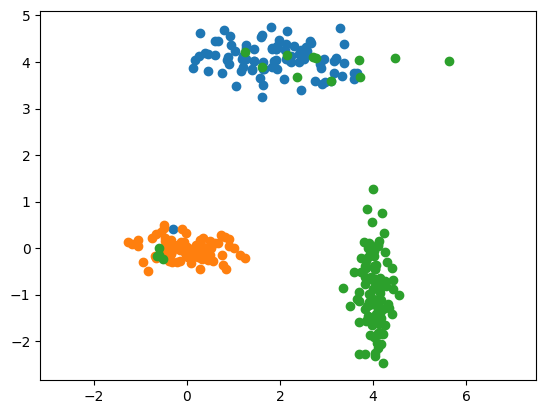

351   [np.float64(1.6), np.float64(1.6), np.float64(1.6), np.float64(1.6), np.float64(1.6)]
352   [np.float64(1.56), np.float64(1.6), np.float64(1.6), np.float64(1.6), np.float64(1.6)]
353   [np.float64(1.56), np.float64(1.59), np.float64(1.6), np.float64(1.6), np.float64(1.6)]
354   [np.float64(1.56), np.float64(1.56), np.float64(1.59), np.float64(1.6), np.float64(1.6)]
355   [np.float64(1.56), np.float64(1.56), np.float64(1.56), np.float64(1.56), np.float64(1.56)]
356   [np.float64(1.56), np.float64(1.56), np.float64(1.56), np.float64(1.56), np.float64(1.56)]
357   [np.float64(1.56), np.float64(1.56), np.float64(1.56), np.float64(1.56), np.float64(1.56)]
358   [np.float64(1.56), np.float64(1.56), np.float64(1.56), np.float64(1.56), np.float64(1.56)]
359   [np.float64(1.51), np.float64(1.54), np.float64(1.56), np.float64(1.56), np.float64(1.56)]
360   [np.float64(1.51), np.float64(1.51), np.float64(1.53), np.float64(1.54), np.float64(1.56)]


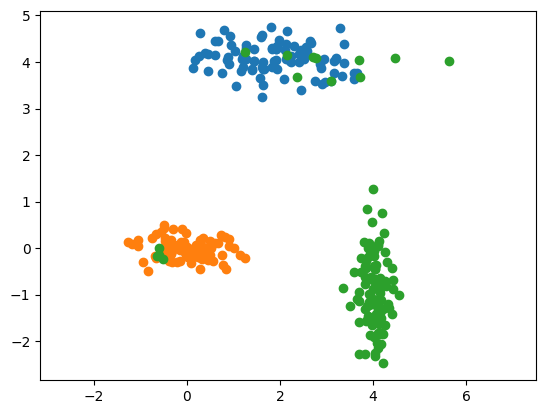

361   [np.float64(1.51), np.float64(1.51), np.float64(1.51), np.float64(1.53), np.float64(1.53)]
362   [np.float64(1.51), np.float64(1.51), np.float64(1.51), np.float64(1.51), np.float64(1.51)]
363   [np.float64(1.51), np.float64(1.51), np.float64(1.51), np.float64(1.51), np.float64(1.51)]
364   [np.float64(1.51), np.float64(1.51), np.float64(1.51), np.float64(1.51), np.float64(1.51)]
365   [np.float64(1.51), np.float64(1.51), np.float64(1.51), np.float64(1.51), np.float64(1.51)]
366   [np.float64(1.51), np.float64(1.51), np.float64(1.51), np.float64(1.51), np.float64(1.51)]
367   [np.float64(1.5), np.float64(1.51), np.float64(1.51), np.float64(1.51), np.float64(1.51)]
368   [np.float64(1.49), np.float64(1.5), np.float64(1.5), np.float64(1.5), np.float64(1.51)]
369   [np.float64(1.47), np.float64(1.48), np.float64(1.49), np.float64(1.5), np.float64(1.5)]
370   [np.float64(1.47), np.float64(1.48), np.float64(1.48), np.float64(1.48), np.float64(1.48)]


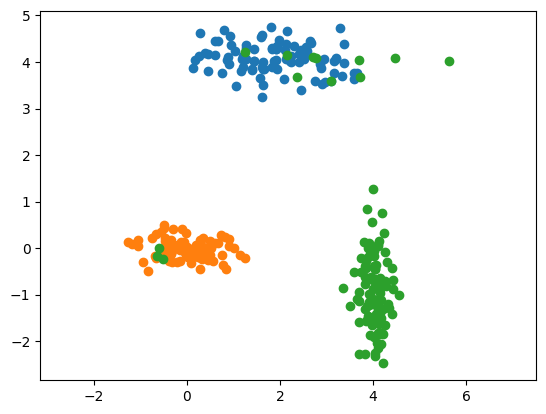

371   [np.float64(1.47), np.float64(1.47), np.float64(1.47), np.float64(1.48), np.float64(1.48)]
372   [np.float64(1.47), np.float64(1.47), np.float64(1.47), np.float64(1.47), np.float64(1.47)]
373   [np.float64(1.47), np.float64(1.47), np.float64(1.47), np.float64(1.47), np.float64(1.47)]
374   [np.float64(1.47), np.float64(1.47), np.float64(1.47), np.float64(1.47), np.float64(1.47)]
375   [np.float64(1.43), np.float64(1.47), np.float64(1.47), np.float64(1.47), np.float64(1.47)]
376   [np.float64(1.43), np.float64(1.46), np.float64(1.47), np.float64(1.47), np.float64(1.47)]
377   [np.float64(1.43), np.float64(1.46), np.float64(1.46), np.float64(1.46), np.float64(1.47)]
378   [np.float64(1.43), np.float64(1.43), np.float64(1.44), np.float64(1.46), np.float64(1.46)]
379   [np.float64(1.43), np.float64(1.43), np.float64(1.43), np.float64(1.44), np.float64(1.44)]
380   [np.float64(1.43), np.float64(1.43), np.float64(1.43), np.float64(1.43), np.float64(1.43)]


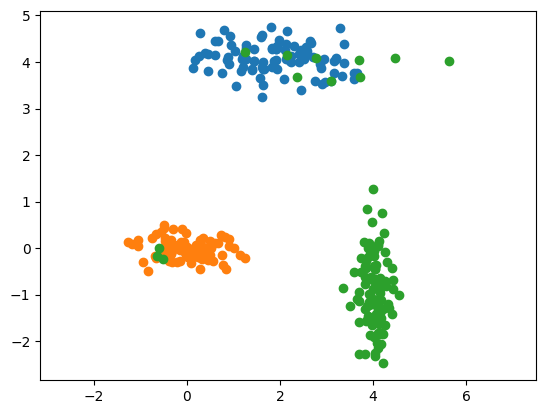

381   [np.float64(1.43), np.float64(1.43), np.float64(1.43), np.float64(1.43), np.float64(1.43)]
382   [np.float64(1.39), np.float64(1.43), np.float64(1.43), np.float64(1.43), np.float64(1.43)]
383   [np.float64(1.39), np.float64(1.39), np.float64(1.41), np.float64(1.41), np.float64(1.43)]
384   [np.float64(1.39), np.float64(1.39), np.float64(1.39), np.float64(1.39), np.float64(1.39)]
385   [np.float64(1.37), np.float64(1.38), np.float64(1.39), np.float64(1.39), np.float64(1.39)]
386   [np.float64(1.37), np.float64(1.38), np.float64(1.39), np.float64(1.39), np.float64(1.39)]
387   [np.float64(1.37), np.float64(1.37), np.float64(1.38), np.float64(1.38), np.float64(1.38)]
388   [np.float64(1.34), np.float64(1.37), np.float64(1.37), np.float64(1.37), np.float64(1.38)]
389   [np.float64(1.34), np.float64(1.37), np.float64(1.37), np.float64(1.37), np.float64(1.38)]
390   [np.float64(1.34), np.float64(1.37), np.float64(1.37), np.float64(1.37), np.float64(1.37)]


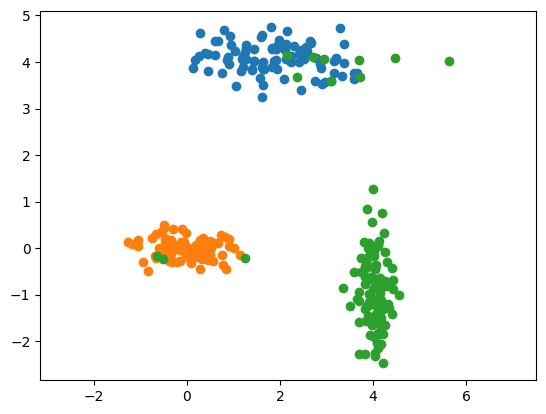

391   [np.float64(1.34), np.float64(1.34), np.float64(1.37), np.float64(1.37), np.float64(1.37)]
392   [np.float64(1.34), np.float64(1.34), np.float64(1.34), np.float64(1.34), np.float64(1.34)]
393   [np.float64(1.32), np.float64(1.34), np.float64(1.34), np.float64(1.34), np.float64(1.34)]
394   [np.float64(1.32), np.float64(1.34), np.float64(1.34), np.float64(1.34), np.float64(1.34)]
395   [np.float64(1.32), np.float64(1.34), np.float64(1.34), np.float64(1.34), np.float64(1.34)]
396   [np.float64(1.29), np.float64(1.29), np.float64(1.32), np.float64(1.34), np.float64(1.34)]
397   [np.float64(1.29), np.float64(1.29), np.float64(1.29), np.float64(1.32), np.float64(1.32)]
398   [np.float64(1.29), np.float64(1.29), np.float64(1.29), np.float64(1.29), np.float64(1.3)]
399   [np.float64(1.28), np.float64(1.29), np.float64(1.29), np.float64(1.29), np.float64(1.29)]
400   [np.float64(1.28), np.float64(1.29), np.float64(1.29), np.float64(1.29), np.float64(1.29)]


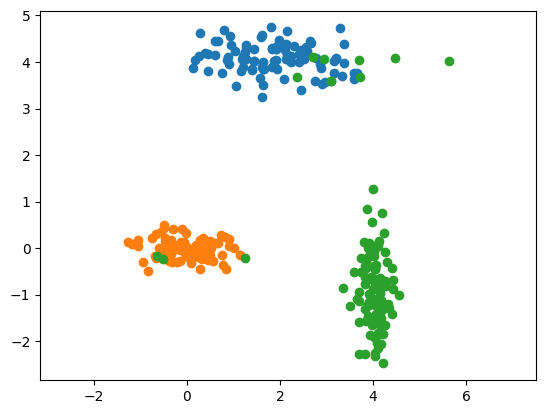

401   [np.float64(1.28), np.float64(1.29), np.float64(1.29), np.float64(1.29), np.float64(1.29)]
402   [np.float64(1.28), np.float64(1.28), np.float64(1.29), np.float64(1.29), np.float64(1.29)]
403   [np.float64(1.28), np.float64(1.28), np.float64(1.29), np.float64(1.29), np.float64(1.29)]
404   [np.float64(1.28), np.float64(1.28), np.float64(1.28), np.float64(1.29), np.float64(1.29)]
405   [np.float64(1.28), np.float64(1.28), np.float64(1.28), np.float64(1.28), np.float64(1.29)]
406   [np.float64(1.28), np.float64(1.28), np.float64(1.28), np.float64(1.28), np.float64(1.28)]
407   [np.float64(1.28), np.float64(1.28), np.float64(1.28), np.float64(1.28), np.float64(1.28)]
408   [np.float64(1.25), np.float64(1.26), np.float64(1.28), np.float64(1.28), np.float64(1.28)]
409   [np.float64(1.25), np.float64(1.26), np.float64(1.26), np.float64(1.27), np.float64(1.28)]
410   [np.float64(1.25), np.float64(1.25), np.float64(1.26), np.float64(1.26), np.float64(1.26)]


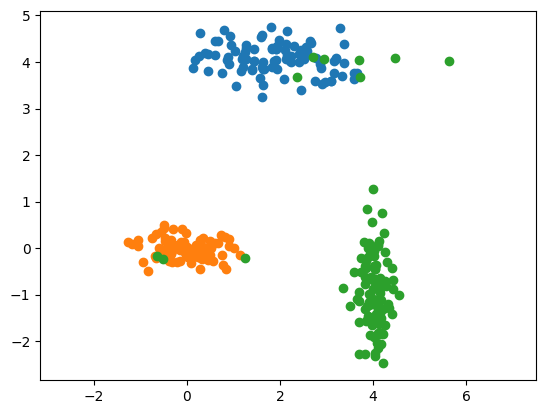

411   [np.float64(1.25), np.float64(1.25), np.float64(1.26), np.float64(1.26), np.float64(1.26)]
412   [np.float64(1.25), np.float64(1.25), np.float64(1.26), np.float64(1.26), np.float64(1.26)]
413   [np.float64(1.24), np.float64(1.25), np.float64(1.25), np.float64(1.26), np.float64(1.26)]
414   [np.float64(1.24), np.float64(1.24), np.float64(1.25), np.float64(1.25), np.float64(1.25)]
415   [np.float64(1.24), np.float64(1.24), np.float64(1.24), np.float64(1.25), np.float64(1.25)]
416   [np.float64(1.21), np.float64(1.22), np.float64(1.23), np.float64(1.24), np.float64(1.24)]
417   [np.float64(1.2), np.float64(1.21), np.float64(1.22), np.float64(1.23), np.float64(1.24)]
418   [np.float64(1.2), np.float64(1.21), np.float64(1.22), np.float64(1.23), np.float64(1.23)]
419   [np.float64(1.2), np.float64(1.21), np.float64(1.22), np.float64(1.22), np.float64(1.22)]
420   [np.float64(1.19), np.float64(1.2), np.float64(1.21), np.float64(1.22), np.float64(1.22)]


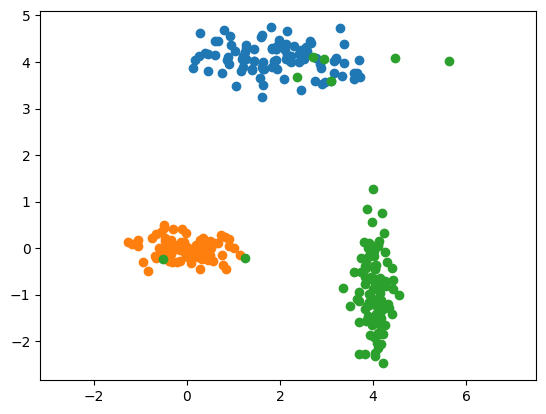

421   [np.float64(1.19), np.float64(1.2), np.float64(1.2), np.float64(1.2), np.float64(1.21)]
422   [np.float64(1.19), np.float64(1.2), np.float64(1.2), np.float64(1.2), np.float64(1.2)]
423   [np.float64(1.19), np.float64(1.19), np.float64(1.2), np.float64(1.2), np.float64(1.2)]
424   [np.float64(1.19), np.float64(1.19), np.float64(1.2), np.float64(1.2), np.float64(1.2)]
425   [np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.2), np.float64(1.2)]
426   [np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.19)]
427   [np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.19)]
428   [np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.19)]
429   [np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.19)]
430   [np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.19)]


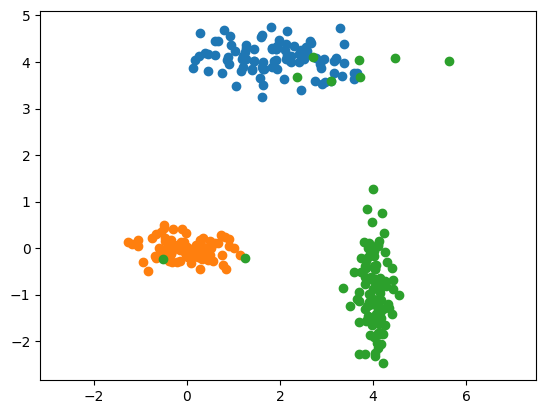

431   [np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.19)]
432   [np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.19)]
433   [np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.19)]
434   [np.float64(1.18), np.float64(1.19), np.float64(1.19), np.float64(1.19), np.float64(1.19)]
435   [np.float64(1.18), np.float64(1.18), np.float64(1.19), np.float64(1.19), np.float64(1.19)]
436   [np.float64(1.18), np.float64(1.18), np.float64(1.19), np.float64(1.19), np.float64(1.19)]
437   [np.float64(1.18), np.float64(1.18), np.float64(1.18), np.float64(1.19), np.float64(1.19)]
438   [np.float64(1.18), np.float64(1.18), np.float64(1.18), np.float64(1.18), np.float64(1.18)]
439   [np.float64(1.18), np.float64(1.18), np.float64(1.18), np.float64(1.18), np.float64(1.18)]
440   [np.float64(1.18), np.float64(1.18), np.float64(1.18), np.float64(1.18), np.float64(1.18)]


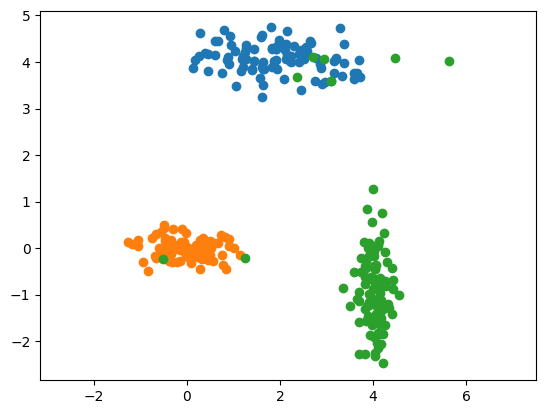

441   [np.float64(1.16), np.float64(1.18), np.float64(1.18), np.float64(1.18), np.float64(1.18)]
442   [np.float64(1.13), np.float64(1.16), np.float64(1.18), np.float64(1.18), np.float64(1.18)]
443   [np.float64(1.13), np.float64(1.13), np.float64(1.16), np.float64(1.16), np.float64(1.18)]
444   [np.float64(1.13), np.float64(1.13), np.float64(1.13), np.float64(1.15), np.float64(1.16)]
445   [np.float64(1.13), np.float64(1.13), np.float64(1.13), np.float64(1.13), np.float64(1.15)]
446   [np.float64(1.13), np.float64(1.13), np.float64(1.13), np.float64(1.13), np.float64(1.13)]
447   [np.float64(1.13), np.float64(1.13), np.float64(1.13), np.float64(1.13), np.float64(1.13)]
448   [np.float64(1.12), np.float64(1.13), np.float64(1.13), np.float64(1.13), np.float64(1.13)]
449   [np.float64(1.12), np.float64(1.12), np.float64(1.13), np.float64(1.13), np.float64(1.13)]
450   [np.float64(1.05), np.float64(1.12), np.float64(1.12), np.float64(1.12), np.float64(1.13)]


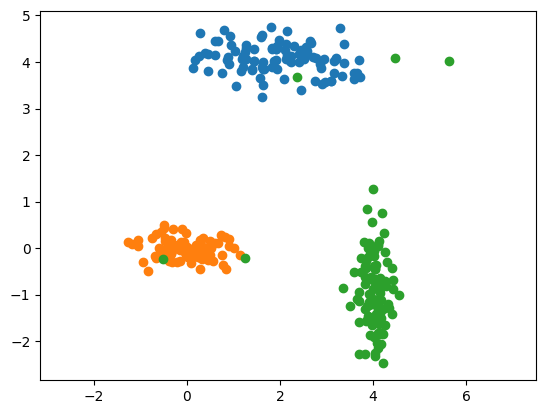

451   [np.float64(1.05), np.float64(1.05), np.float64(1.12), np.float64(1.12), np.float64(1.12)]
452   [np.float64(1.05), np.float64(1.05), np.float64(1.05), np.float64(1.05), np.float64(1.07)]
453   [np.float64(1.05), np.float64(1.05), np.float64(1.05), np.float64(1.05), np.float64(1.05)]
454   [np.float64(1.03), np.float64(1.05), np.float64(1.05), np.float64(1.05), np.float64(1.05)]
455   [np.float64(1.03), np.float64(1.05), np.float64(1.05), np.float64(1.05), np.float64(1.05)]
456   [np.float64(1.03), np.float64(1.05), np.float64(1.05), np.float64(1.05), np.float64(1.05)]
457   [np.float64(1.03), np.float64(1.03), np.float64(1.05), np.float64(1.05), np.float64(1.05)]
458   [np.float64(1.01), np.float64(1.03), np.float64(1.03), np.float64(1.03), np.float64(1.03)]
459   [np.float64(1.01), np.float64(1.03), np.float64(1.03), np.float64(1.03), np.float64(1.03)]
460   [np.float64(1.01), np.float64(1.03), np.float64(1.03), np.float64(1.03), np.float64(1.03)]


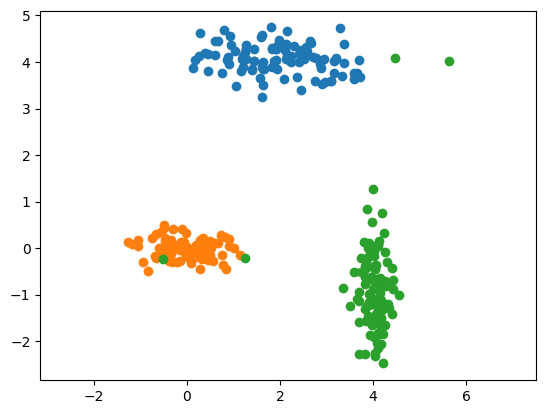

461   [np.float64(1.01), np.float64(1.01), np.float64(1.03), np.float64(1.03), np.float64(1.03)]
462   [np.float64(1.01), np.float64(1.01), np.float64(1.01), np.float64(1.01), np.float64(1.01)]
463   [np.float64(1.01), np.float64(1.01), np.float64(1.01), np.float64(1.01), np.float64(1.01)]
464   [np.float64(1.01), np.float64(1.01), np.float64(1.01), np.float64(1.01), np.float64(1.01)]
465   [np.float64(1.01), np.float64(1.01), np.float64(1.01), np.float64(1.01), np.float64(1.01)]
466   [np.float64(0.99), np.float64(1.01), np.float64(1.01), np.float64(1.01), np.float64(1.01)]
467   [np.float64(0.99), np.float64(1.01), np.float64(1.01), np.float64(1.01), np.float64(1.01)]
468   [np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(1.01), np.float64(1.01)]
469   [np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99)]
470   [np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99)]


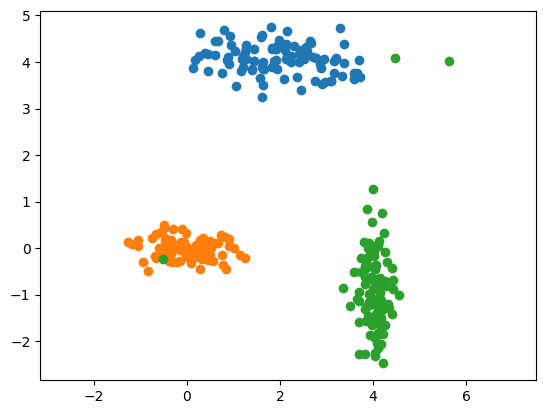

471   [np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99)]
472   [np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99)]
473   [np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99)]
474   [np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99)]
475   [np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99)]
476   [np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99)]
477   [np.float64(0.97), np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99)]
478   [np.float64(0.97), np.float64(0.99), np.float64(0.99), np.float64(0.99), np.float64(0.99)]
479   [np.float64(0.97), np.float64(0.97), np.float64(0.99), np.float64(0.99), np.float64(0.99)]
480   [np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.99), np.float64(0.99)]


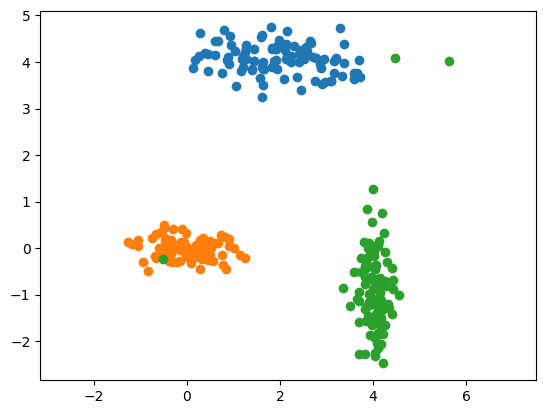

481   [np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97)]
482   [np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97)]
483   [np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97)]
484   [np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97)]
485   [np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97)]
486   [np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97)]
487   [np.float64(0.94), np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97)]
488   [np.float64(0.94), np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97)]
489   [np.float64(0.94), np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97)]
490   [np.float64(0.94), np.float64(0.94), np.float64(0.95), np.float64(0.97), np.float64(0.97)]


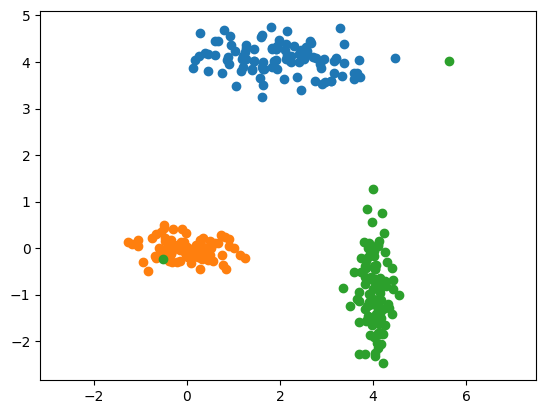

491   [np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.95)]
492   [np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94)]
493   [np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94)]
494   [np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94)]
495   [np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94)]
496   [np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94)]
497   [np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94)]
498   [np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94)]
499   [np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94)]
500   [np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94)]


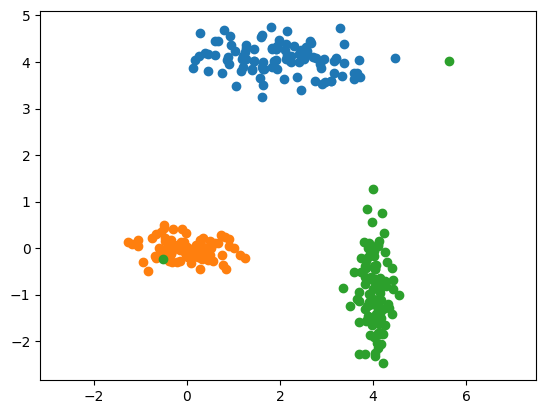

501   [np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94)]
502   [np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94)]
503   [np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94)]
504   [np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94)]
505   [np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94)]
506   [np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94)]
507   [np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94), np.float64(0.94)]
508   [np.float64(0.92), np.float64(0.93), np.float64(0.94), np.float64(0.94), np.float64(0.94)]
509   [np.float64(0.92), np.float64(0.93), np.float64(0.94), np.float64(0.94), np.float64(0.94)]
510   [np.float64(0.92), np.float64(0.93), np.float64(0.93), np.float64(0.93), np.float64(0.94)]


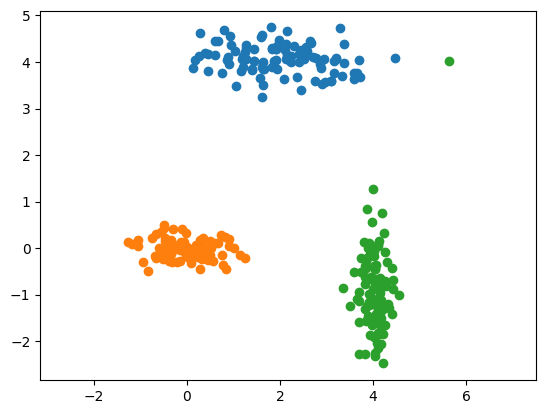

511   [np.float64(0.92), np.float64(0.92), np.float64(0.93), np.float64(0.93), np.float64(0.93)]
512   [np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.93)]
513   [np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
514   [np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
515   [np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
516   [np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
517   [np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
518   [np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
519   [np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
520   [np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]


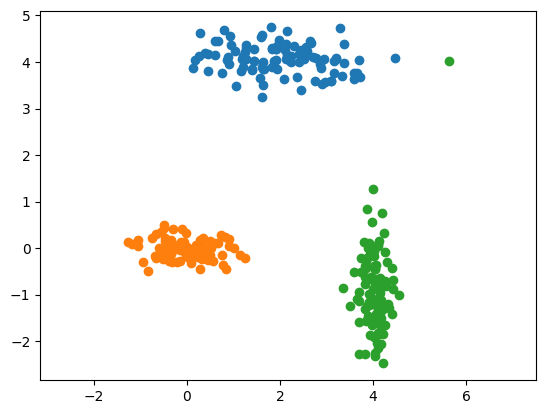

521   [np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
522   [np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
523   [np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
524   [np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
525   [np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
526   [np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
527   [np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
528   [np.float64(0.91), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
529   [np.float64(0.91), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
530   [np.float64(0.91), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]


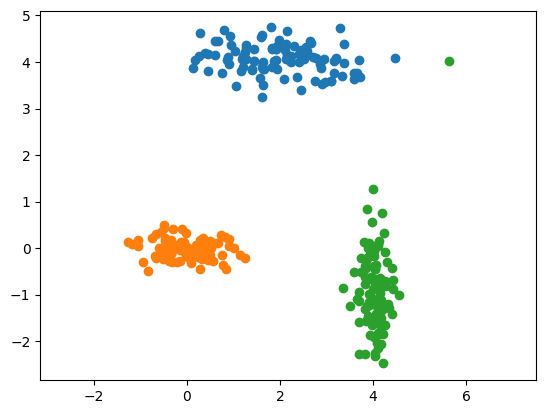

531   [np.float64(0.91), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
532   [np.float64(0.91), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
533   [np.float64(0.91), np.float64(0.92), np.float64(0.92), np.float64(0.92), np.float64(0.92)]
534   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.92), np.float64(0.92)]
535   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.92), np.float64(0.92)]
536   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
537   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
538   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
539   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
540   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


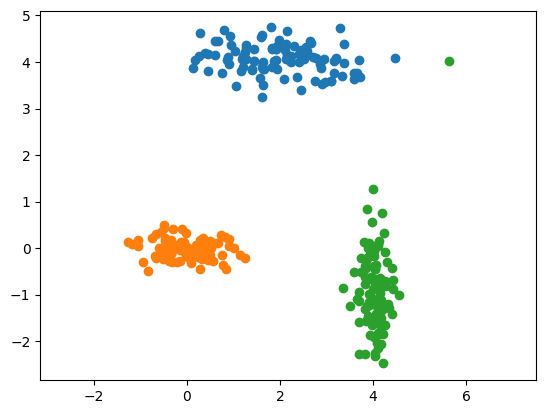

541   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
542   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
543   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
544   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
545   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
546   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
547   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
548   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
549   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
550   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


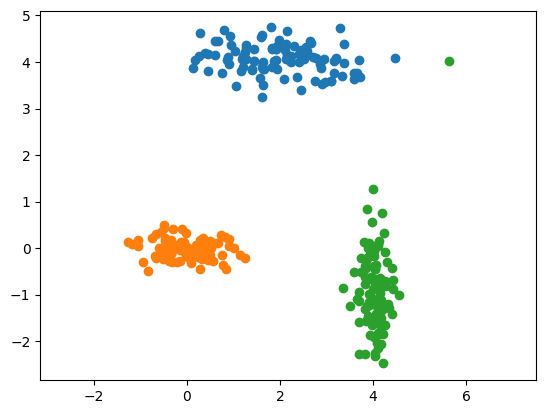

551   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
552   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
553   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
554   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
555   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
556   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
557   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
558   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
559   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
560   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


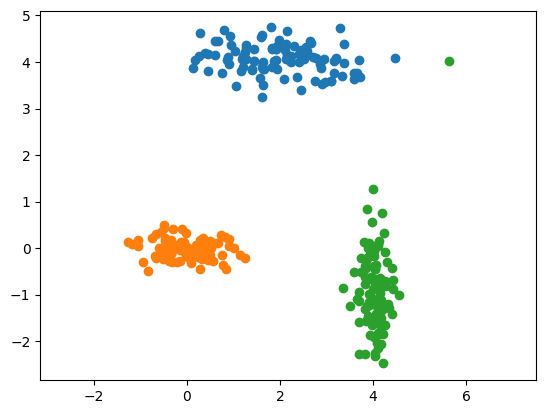

561   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
562   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
563   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
564   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
565   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
566   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
567   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
568   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
569   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
570   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


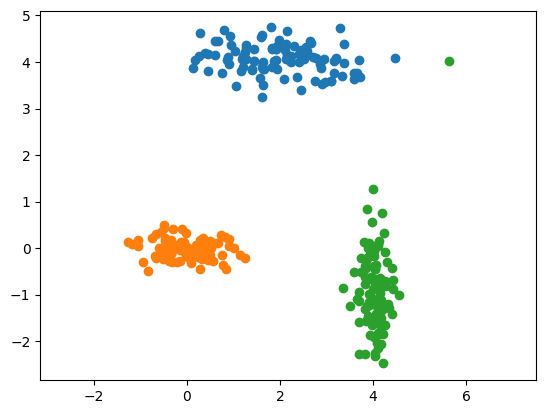

571   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
572   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
573   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
574   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
575   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
576   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
577   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
578   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
579   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
580   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


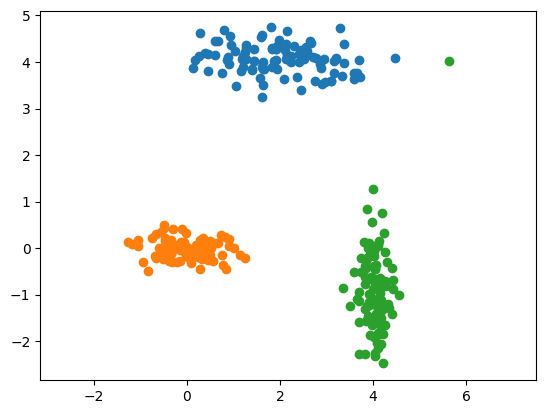

581   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
582   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
583   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
584   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
585   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
586   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
587   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
588   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
589   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
590   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


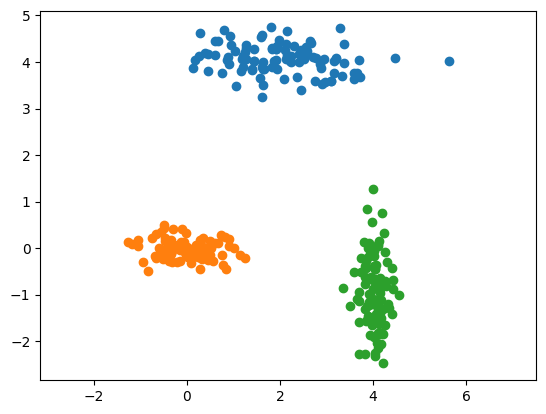

591   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
592   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
593   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
594   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
595   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
596   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
597   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
598   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
599   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
600   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


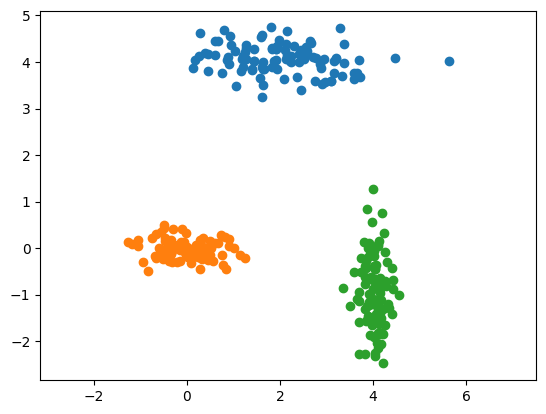

601   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
602   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
603   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
604   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
605   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
606   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
607   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
608   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
609   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
610   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


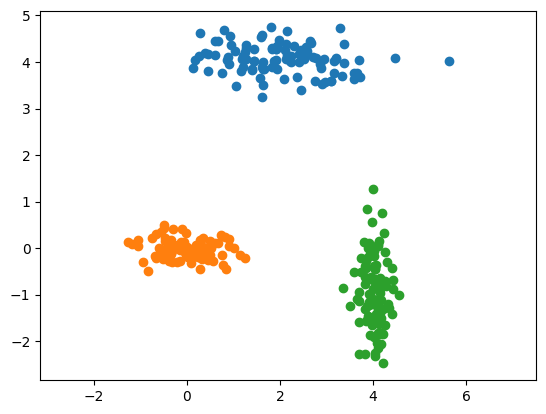

611   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
612   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
613   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
614   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
615   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
616   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
617   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
618   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
619   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
620   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


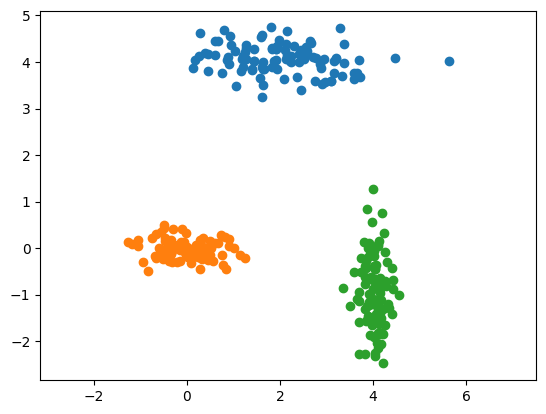

621   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
622   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
623   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
624   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
625   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
626   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
627   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
628   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
629   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
630   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


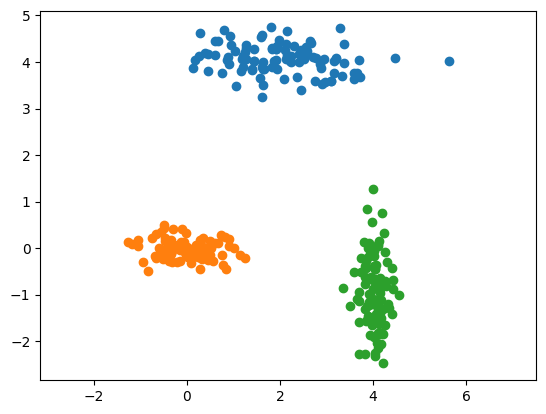

631   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
632   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
633   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
634   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
635   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
636   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
637   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
638   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
639   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
640   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


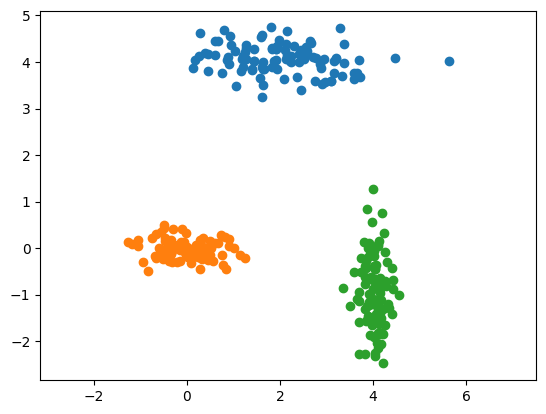

641   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
642   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
643   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
644   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
645   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
646   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
647   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
648   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
649   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
650   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


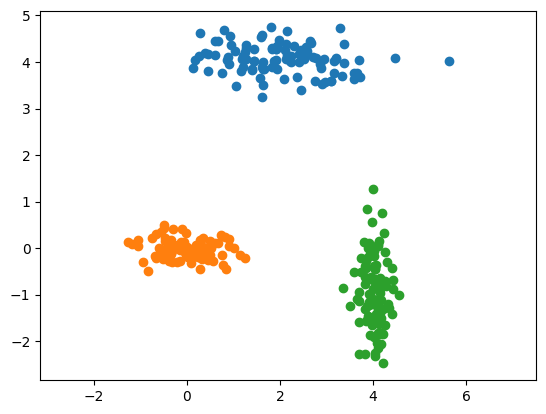

651   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
652   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
653   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
654   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
655   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
656   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
657   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
658   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
659   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
660   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


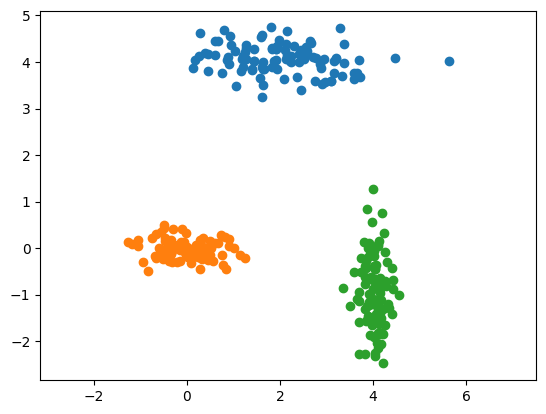

661   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
662   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
663   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
664   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
665   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
666   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
667   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
668   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
669   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
670   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


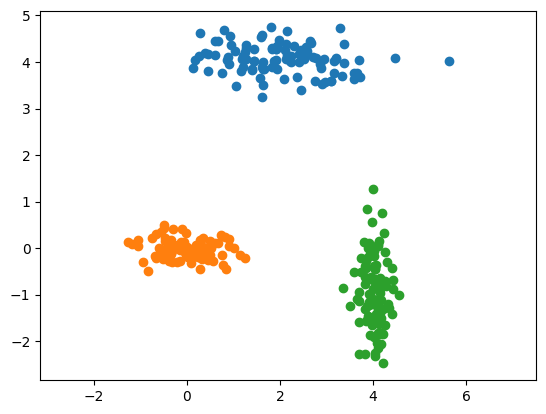

671   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
672   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
673   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
674   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
675   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
676   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
677   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
678   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
679   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
680   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


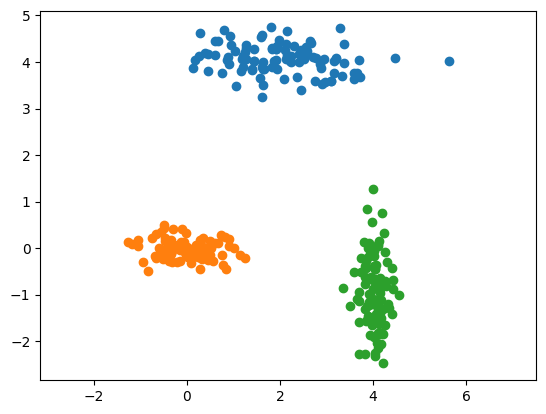

681   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
682   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
683   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
684   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
685   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
686   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
687   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
688   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
689   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
690   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


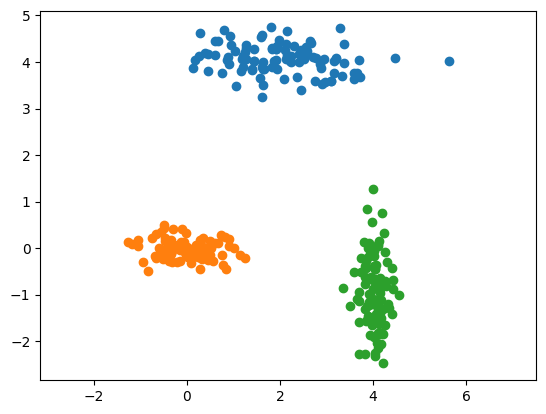

691   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
692   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
693   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
694   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
695   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
696   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
697   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
698   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
699   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
700   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


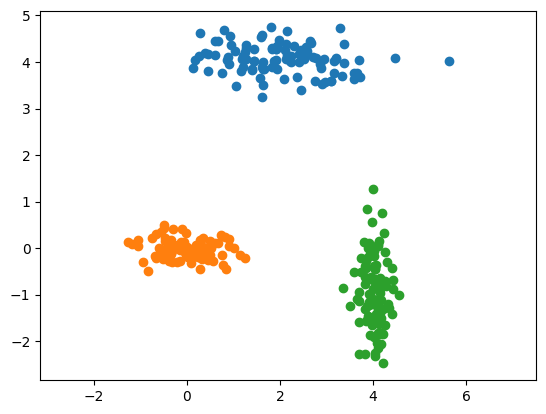

701   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
702   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
703   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
704   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
705   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
706   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
707   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
708   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
709   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
710   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


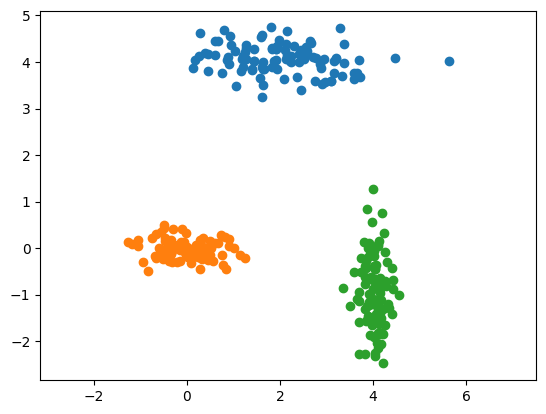

711   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
712   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
713   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
714   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
715   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
716   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
717   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
718   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
719   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
720   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


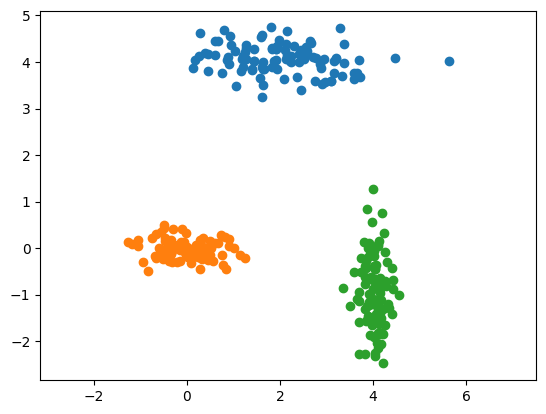

721   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
722   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
723   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
724   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
725   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
726   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
727   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
728   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
729   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
730   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


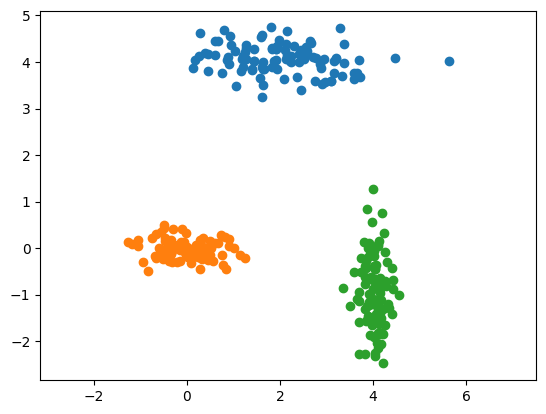

731   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
732   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
733   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
734   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
735   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
736   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
737   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
738   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
739   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
740   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


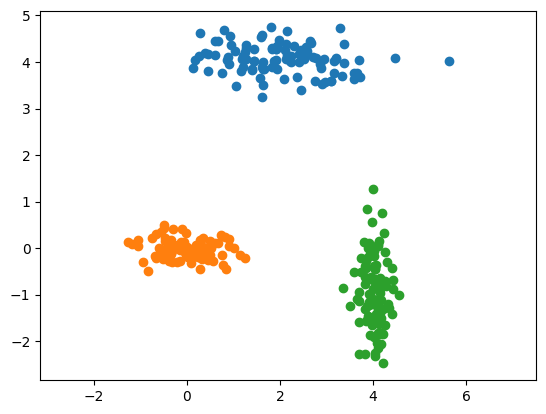

741   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
742   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
743   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
744   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
745   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
746   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
747   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
748   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
749   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
750   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


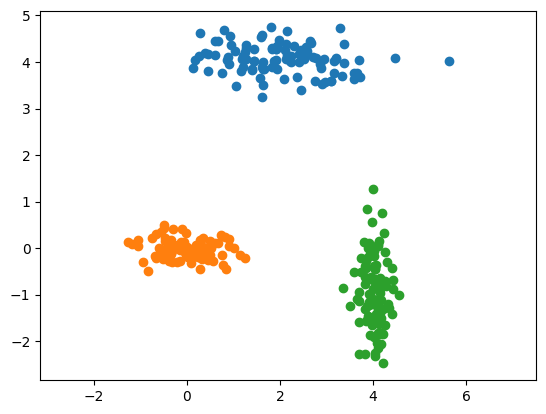

751   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
752   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
753   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
754   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
755   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
756   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
757   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
758   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
759   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
760   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


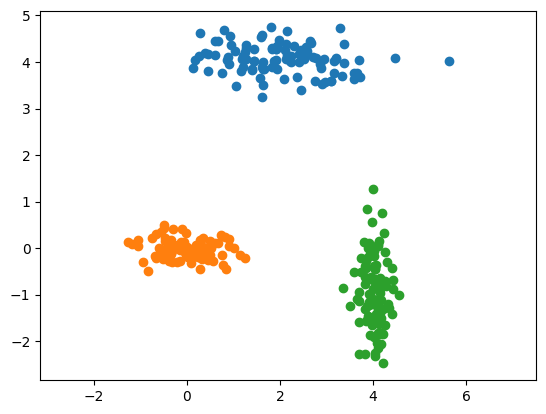

761   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
762   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
763   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
764   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
765   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
766   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
767   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
768   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
769   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
770   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


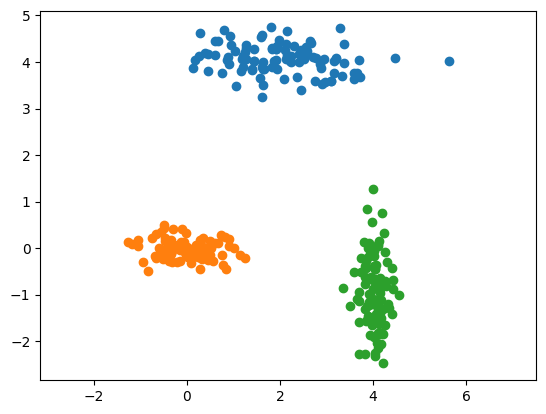

771   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
772   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
773   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
774   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
775   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
776   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
777   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
778   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
779   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
780   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


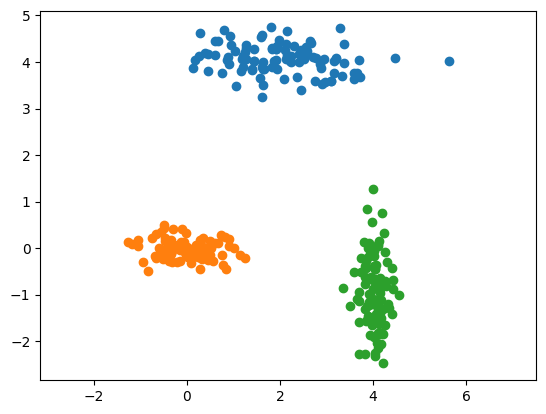

781   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
782   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
783   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
784   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
785   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
786   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
787   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
788   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
789   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
790   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


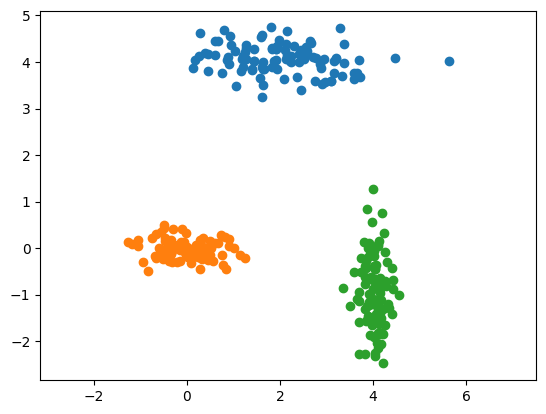

791   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
792   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
793   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
794   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
795   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
796   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
797   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
798   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]
799   [np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91), np.float64(0.91)]


In [ ]:
npopul = 100        # Указываем размер популяции
nsurv = 20          # Указываем число выживших ботов
nnew = npopul-nsurv # Указываем число новых ботов, рождающихся на каждой эпохе
l = 300             # Указываем число генов у бота
epohs = 800         # Указываем число поколений - эпох

mut = 0.01          # Задаем коэффициент мутации

popul = []          # Создаем пустой список для популяции
val = []            # Создаем лист для ошибок ботов

for i in range(npopul):     # Создаем начальную популяцию
  popul.append(createBot()) # В популяцию добавляем 100 новых ботов

for it in range(epohs): # Проходим по каждой эпохе

  val = [getBotError(bot) for bot in popul] # Считаем ошибку каждого бота

  newpopul, sval = getSurvPopul(popul, val, nsurv, 0) # Возвращаем новую популяцию из выживших и сортированный список из ошибок лучших ботов
  print(it, " ", [round(s,2) for s in sval[0:5]])     # Выводим информацию
  if (it % 10 == 0):     # Каждую 10-ую эпоху
    plotBot(newpopul[0]) # Рисуем как лучший бот кластеризует все точки

  for i in range(nnew):  # Создаем новых ботов

    botp1, botp2 = getParents(newpopul, nsurv) # Получаем родителей
    newbot = [] # Создаем пустой список для генов нового бота

    for j in range(l): # Проходим по всем генам
      x = crossPointFrom2Parents(botp1, botp2, j) # Возвращаем ген
      if (random.random() < mut): # Создаем случайное число и, если оно меньше коэффициента мутации
        x = random.randint(0,2)   # Новый ген делаем абсолютно случайным

      newbot.append(x)        # Добавляем в бота выбранный ген

    newbot = np.array(newbot) # Преобазуем newbot в Numpy
    newpopul.append(newbot)   # Добавляем бота в популяцию

  popul = newpopul # Новую популяцию делаем текущей популяцией